**<div style="border:15px solid green; padding: 12px; font-size: 15px;">**
## <span style='color:red;'>  **PROJET DE PYTHON POUR L'ANN√âE ACCAD√âMIQUE 2023-2024**</span>
## <span style='color:red;'>NOM DU PARTICIPANT</span>:   **AFADONOU KOKOUVI**
## <span style='color:red;'>PARCOURS</span>:    **CEPOPP**
## <span style='color:red;'>NOM DE L'ENSEIGNANT</span>:    **ALEXANDRE WAREMBOURG** </div>




****
## ***<span style='color:green;'> Notre projet vise √† analyser les tendances et les facteurs de risque associ√©s aux accidents de la circulation lies aux vehicules de type 1 impliquant des pi√©tons et des cyclistes dans les divers arrondissements. Ensuite, nous d√©velopperons un mod√®le permettant de pr√©dire si le fait d'emprunter une rue √† des heures sp√©cifiques, un jour donn√© de la semaine et pendant un mois particulier accro√Æt le risque d'accident </span>***.
****

#### Importation des packages n√©cessaires pour la manipulation des donn√©es

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer

## **I** **<span style='color:blue;'>**Importation des deux jeux de donn√©es qui feront l'objet de notre analyse**</span>**

In [164]:
collision_type = pd.read_csv(r"C:\Users\pc\Desktop\collision_type.csv", sep ="|")
person_crash = pd.read_csv(r"C:\Users\pc\Desktop\person_crash.csv", sep = "|")

C:\Users\pc\AppData\Local\Temp\ipykernel_3132\1692856231.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  person_crash = pd.read_csv(r"C:\Users\pc\Desktop\person_crash.csv", sep = "|")


## D√©tail du nom des variables dans le jeu de donn√©e person_crash

1.  **crash_date** : La date √† laquelle l'accident s'est produit.
2. **crash_time**: L'heure √† laquelle l'accident s'est produit.
3. **on_street_name**: Le nom de la rue o√π l'accident s'est produit.
4. **off_street_name**: Le nom de la rue adjacente o√π l'accident s'est produit, s'il y en a une.
5. **number_of_persons_injured**: Le nombre total de personnes bless√©es dans l'accident.
6. **number_of_persons_killed**: Le nombre total de personnes tu√©es dans l'accident.
7. **number_of_pedestrians_injured**: Le nombre de pi√©tons bless√©s dans l'accident.
8. **number_of_pedestrians_killed**: Le nombre de pi√©tons tu√©s dans l'accident.
9. **number_of_cyclist_injured**: Le nombre de cyclistes bless√©s dans l'accident.
10. **number_of_cyclist_killed**: Le nombre de cyclistes tu√©s dans l'accident.
11. **number_of_motorist_injured**: Le nombre de conducteurs bless√©s dans l'accident.
12. **number_of_motorist_killed**: Le nombre de conducteurs tu√©s dans l'accident.
13. **collision_id**: L'identifiant unique de la collision.
14. **borough**: Le quartier de la ville o√π l'accident s'est produit.
15. **zip_code**: Le code postal de la zone o√π l'accident s'est produit.
16. **latitude**: La latitude de l'emplacement de l'accident.
17. **longitude**: La longitude de l'emplacement de l'accident.
18. **location**: La localisation pr√©cise de l'accident.
19. **cross_street_name**: Le nom de la rue transversale o√π l'accident s'est produit.

## D√©tail du nom des variables dans le jeu de donn√©es collision_type

1. **crash_date** : La date √† laquelle l'accident s'est produit.
2. **crash_time** : L'heure √† laquelle l'accident s'est produit.
3. **collision_id** : L'identifiant unique de la collision.
4. **vehicle_type_code1** : Le code du type de v√©hicule impliqu√© dans l'accident (premier v√©hicule).
5. **vehicle_type_code2** : Le code du type de v√©hicule impliqu√© dans l'accident (deuxi√®me v√©hicule).
6. **vehicle_type_code_3** : Le code du type de v√©hicule impliqu√© dans l'accident (troisi√®me v√©hicule, le cas √©ch√©ant).
7. **vehicle_type_code_4** : Le code du type de v√©hicule impliqu√© dans l'accident (quatri√®me v√©hicule, le cas √©ch√©ant).
8. **vehicle_type_code_5** : Le code du type de v√©hicule impliqu√© dans l'accident (cinqui√®me v√©hicule, le cas √©ch√©ant).
9. **contributing_factor_vehicle_1** : Le facteur contributif principal √† l'accident pour le premier v√©hicule impliqu√©.
10. **contributing_factor_vehicle_2** : Le facteur contributif principal √† l'accident pour le deuxi√®me v√©hicule impliqu√©.
11. **contributing_factor_vehicle_3** : Le facteur contributif principal √† l'accident pour le troisi√®me v√©hicule impliqu√©.
12. **contributing_factor_vehicle_4** : Le facteur contributif principal √† l'accident pour le quatri√®me v√©hicule impliqu√©.
13. **contributing_factor_vehicle_5** : Le facteur contributif principal √† l'accident pour le cinqui√®me v√©hicule impliqu√©.

## **I-1.** **<span style='color:blue;'>**Inspection des deux jeux de donn√©es**</span>**

In [165]:
collision_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 14 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   Unnamed: 0                     int64 
 1   crash_date                     object
 2   crash_time                     object
 3   collision_id                   int64 
 4   vehicle_type_code1             object
 5   vehicle_type_code2             object
 6   vehicle_type_code_3            object
 7   vehicle_type_code_4            object
 8   vehicle_type_code_5            object
 9   contributing_factor_vehicle_1  object
 10  contributing_factor_vehicle_2  object
 11  contributing_factor_vehicle_3  object
 12  contributing_factor_vehicle_4  object
 13  contributing_factor_vehicle_5  object
dtypes: int64(2), object(12)
memory usage: 213.6+ MB


##### Dans notre ensemble de donn√©es sur les types de collisions, une enqu√™te a √©t√© men√©e aupr√®s de 2 000 000 d'individus, avec 14 variables comprenant 2 variables quantitatives et 12 variables qualitatives. Ce jeu de donn√©es occupe une m√©moire de 213,6 m√©gabits.

In [166]:
person_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   crash_date                     object 
 2   crash_time                     object 
 3   on_street_name                 object 
 4   off_street_name                object 
 5   number_of_persons_injured      float64
 6   number_of_persons_killed       float64
 7   number_of_pedestrians_injured  int64  
 8   number_of_pedestrians_killed   int64  
 9   number_of_cyclist_injured      int64  
 10  number_of_cyclist_killed       int64  
 11  number_of_motorist_injured     int64  
 12  number_of_motorist_killed      int64  
 13  collision_id                   int64  
 14  borough                        object 
 15  zip_code                       object 
 16  latitude                       float64
 17  longitude                      float64
 18  lo

##### Dans notre jeu de donn√©es portant sur les personnes accident√©es, une enqu√™te a √©t√© men√©e aupr√®s de 2 000 000 d'individus, comprenant 20 variables dont 12 sont des variables quantitatives et 8 sont des variables qualitatives. Ce jeu de donn√©es occupe une m√©moire de 305,2 m√©gaoctets.

### **I-2**  **<span style='color:blue;'>**Visualisation des valeurs manquantes et voir s'il y a des possibilit√©s de les traiter avec les diff√©rentes m√©thodes vues aux cours**</span>**

In [167]:
person_crash.isnull().sum()/(len(person_crash))*100

Unnamed: 0                        0.00000
crash_date                        0.00000
crash_time                        0.00000
on_street_name                   20.97965
off_street_name                  37.28745
number_of_persons_injured         0.00090
number_of_persons_killed          0.00155
number_of_pedestrians_injured     0.00000
number_of_pedestrians_killed      0.00000
number_of_cyclist_injured         0.00000
number_of_cyclist_killed          0.00000
number_of_motorist_injured        0.00000
number_of_motorist_killed         0.00000
collision_id                      0.00000
borough                          31.09410
zip_code                         31.10600
latitude                         11.41525
longitude                        11.41525
location                         11.41525
cross_street_name                83.63900
dtype: float64

In [168]:
# Visualiser les valeurs manquantes  pour la base collision_type
collision_type.isnull().sum()/(len(collision_type))*100

Unnamed: 0                        0.00000
crash_date                        0.00000
crash_time                        0.00000
collision_id                      0.00000
vehicle_type_code1                0.62245
vehicle_type_code2               18.55585
vehicle_type_code_3              93.17940
vehicle_type_code_4              98.47195
vehicle_type_code_5              99.58695
contributing_factor_vehicle_1     0.31305
contributing_factor_vehicle_2    15.19765
contributing_factor_vehicle_3    92.93620
contributing_factor_vehicle_4    98.41985
contributing_factor_vehicle_5    99.57450
dtype: float64

## **I-3**. **<span style='color:blue;'>**S√©lection des variables pour faire notre analyse; dans le jeu de donn√©es collision_type, nous allons √©liminer la colonne des vehicules 3; 4 et 5 car elles presentent plus de 80% des valeurs manquantes**</span>**

In [169]:
# S√©l√©ction des variables dans le jeu de donn√©e "collision_type"
collision_type = collision_type[["crash_date","crash_time","collision_id","vehicle_type_code1","contributing_factor_vehicle_1"]]
# Convertissons la colonne "carsh_date" en type de donn√©es datetime
collision_type["crash_date"] = pd.to_datetime(collision_type["crash_date"])
collision_type.head()

crash_date crash_time  collision_id vehicle_type_code1  \
0 2021-09-11       2:39       4455765              Sedan   
1 2022-03-26      11:45       4513547              Sedan   
2 2022-06-29       6:55       4541903              Sedan   
3 2021-09-11       9:35       4456314              Sedan   
4 2021-12-14       8:13       4486609                NaN   

  contributing_factor_vehicle_1  
0  Aggressive Driving/Road Rage  
1             Pavement Slippery  
2         Following Too Closely  
3                   Unspecified  
4                           NaN

In [170]:
# S√©l√©ction des variables dans le jeu de donn√©e "person_crash"
person_crash = person_crash[["crash_date","collision_id","crash_time","on_street_name","number_of_persons_injured","number_of_persons_killed",
"number_of_pedestrians_injured","number_of_pedestrians_killed","number_of_cyclist_injured","number_of_cyclist_killed","number_of_motorist_injured",
"number_of_motorist_killed","borough","latitude","longitude","location"]] 


In [171]:
# Convertissons la colonne "carsh_date" en type de donn√©es datetime
person_crash["crash_date"] = pd.to_datetime(person_crash["crash_date"])
person_crash.head()

crash_date  collision_id crash_time           on_street_name  \
0 2021-09-11       4455765       2:39    WHITESTONE EXPRESSWAY   
1 2022-03-26       4513547      11:45  QUEENSBORO BRIDGE UPPER   
2 2022-06-29       4541903       6:55       THROGS NECK BRIDGE   
3 2021-09-11       4456314       9:35                      NaN   
4 2021-12-14       4486609       8:13          SARATOGA AVENUE   

   number_of_persons_injured  number_of_persons_killed  \
0                        2.0                       0.0   
1                        1.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   number_of_pedestrians_injured  number_of_pedestrians_killed  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   number_of_cyclist_injured  number_of_cyclist_killed  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   number_of_motorist_injured  number_of_motorist_killed   borough   latitude  \
0                           2                          0       NaN        NaN   
1                           1                          0       NaN        NaN   
2                           0                          0       NaN        NaN   
3                           0                          0  BROOKLYN  40.667202   
4                           0                          0  BROOKLYN  40.683304   

   longitude                                           location  
0        NaN                                                NaN  
1        NaN                                                NaN  
2        NaN                                                NaN  
3 -73.866500  {'latitude': '40.667202', 'longitude': '-73.86...  
4 -73.917274  {'latitude': '40.683304', 'longitude': '-73.91...

## **I-4**. **<span style='color:blue;'>**Traitement des donn√©es manquantes dans le jeu de donn√©es "collision_type"**</span>**

En examinant la valeur des donn√©es manquantes dans l'ensemble de donn√©es "collision_type", nous sommes en mesure de rem√©dier aux lacunes observ√©es dans les colonnes "vehicle_type_code1", "contributing_factor_vehicle_1",'vehicle_type_code2',
'contributing_factor_vehicle_2' en appliquant la m√©thode de propagation de la derni√®re valeur observ√©e. Cette d√©cision repose sur l'hypoth√®se selon laquelle, en cas d'accident √† un moment donn√© et en un endroit sp√©cifique, la probabilit√© que celui-ci se produise √† ce m√™me moment est significative.

In [172]:
# Imputation des valeurs manquantes pour vehicle_type_code1 et contributing_factor_vehicle_1 par une valeur la plus proche
collision_type['vehicle_type_code1'].fillna(method='ffill', inplace=True)
collision_type['contributing_factor_vehicle_1'].fillna(method='ffill', inplace=True)


# V√©rification des valeurs manquantes apr√®s l'imputation
print(collision_type.isnull().sum())


C:\Users\pc\AppData\Local\Temp\ipykernel_3132\1647310346.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  collision_type['vehicle_type_code1'].fillna(method='ffill', inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_3132\1647310346.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  collision_type['contributing_factor_vehicle_1'].fillna(method='ffill', inplace=True)


crash_date                       0
crash_time                       0
collision_id                     0
vehicle_type_code1               0
contributing_factor_vehicle_1    0
dtype: int64


#### **I-4-1**. **<span style='color:blue;'>**Dans l'ensemble du jeu de donn√©es "person_crash", nous envisageons appliquer la m√©thode d'imputation des valeurs manquantes par la methode forward fill pour les valeurs numeriques et par inconnu les valeurs categorielles**</span>**

In [173]:
from sklearn.impute import SimpleImputer

# Imputation pour les variables num√©riques (par la methode ffill)
numeric_columns = ['number_of_persons_injured', 'number_of_persons_killed', 'latitude', 'longitude']

person_crash[numeric_columns] = person_crash[numeric_columns].fillna(method='ffill')

print(person_crash.isnull().sum())


C:\Users\pc\AppData\Local\Temp\ipykernel_3132\3531823866.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  person_crash[numeric_columns] = person_crash[numeric_columns].fillna(method='ffill')


crash_date                            0
collision_id                          0
crash_time                            0
on_street_name                   419593
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
borough                          621882
latitude                              3
longitude                             3
location                         228305
dtype: int64


In [174]:

# Remplacement des valeurs manquantes par 'Unknown' pour les variables cat√©gorielles
categorical_columns = ['borough', 'on_street_name', 'location']
person_crash[categorical_columns] = person_crash[categorical_columns].fillna('Unknown')

# V√©rification des valeurs manquantes apr√®s l'imputation
print("\nValeurs manquantes apr√®s imputation :")
print(person_crash.isnull().sum())


Valeurs manquantes apr√®s imputation :
crash_date                       0
collision_id                     0
crash_time                       0
on_street_name                   0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
borough                          0
latitude                         3
longitude                        3
location                         0
dtype: int64


##  **I-4-2**. **<span style='color:blue;'>**Nous allons supprimer les NAS dans les colonnes Latitude et longitude car leurs pourcentage restent insignifiant dans notre jeu de donnee**</span>**

In [175]:
person_crash.dropna(subset=['longitude', 'latitude'], inplace=True)

In [176]:
person_crash.isnull().sum()

crash_date                       0
collision_id                     0
crash_time                       0
on_street_name                   0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
borough                          0
latitude                         0
longitude                        0
location                         0
dtype: int64

## **I-5**. **<span style='color:blue;'>**Fusion des deux bases de donn√©es et qui sera nomm√©e accident_data**</span>**

In [177]:
# Fusion des DataFrames sur les colonnes crash_date et crash_time
accident_data = pd.merge(person_crash, collision_type, on=['crash_date', 'crash_time','collision_id'], how= 'inner')

# V√©rification des valeurs manquantes apr√®s la fusion
print("\nValeurs manquantes apr√®s fusion :")
print(accident_data.isnull().sum())



Valeurs manquantes apr√®s fusion :
crash_date                       0
collision_id                     0
crash_time                       0
on_street_name                   0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
borough                          0
latitude                         0
longitude                        0
location                         0
vehicle_type_code1               0
contributing_factor_vehicle_1    0
dtype: int64


## Informations sur les donn√©es

In [178]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999997 entries, 0 to 1999996
Data columns (total 18 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   crash_date                     datetime64[ns]
 1   collision_id                   int64         
 2   crash_time                     object        
 3   on_street_name                 object        
 4   number_of_persons_injured      float64       
 5   number_of_persons_killed       float64       
 6   number_of_pedestrians_injured  int64         
 7   number_of_pedestrians_killed   int64         
 8   number_of_cyclist_injured      int64         
 9   number_of_cyclist_killed       int64         
 10  number_of_motorist_injured     int64         
 11  number_of_motorist_killed      int64         
 12  borough                        object        
 13  latitude                       float64       
 14  longitude                      float64       
 15  location       

Cette base de donn√©es contient des informations importantes pour comprendre les accidents de la circulation. Les variables telles que la date et l'heure de l'accident, les types de v√©hicules impliqu√©s, les facteurs contributifs, le lieu de l'accident, le nombre de victimes, l'arrondissement et les coordonn√©es g√©ographiques offrent une vue compl√®te de chaque incident. En tant que data scientist, l'analyse de ces donn√©es nous permettrait d'identifier les tendances temporelles et spatiales des accidents, d'identifier les facteurs de risque les plus pr√©occupants, et de proposer des interventions cibl√©es pour am√©liorer la s√©curit√© routi√®re

In [179]:
accident_data.duplicated().sum()

0

## Nous n'avons pas de doublons dans notre base de donnee

#  **II**  **<span style='color:blue;'> LA STATISTIQUE DESCRIPTIVE </span>** (**<span style='color:blue;'> ANALYSE UNIVARIEE </span>**)

In [180]:
# S√©lection des variables qualitatives
qualitative_variables = accident_data.select_dtypes(include='object')

# Affichage des statistiques descriptives
qualitative_variables.describe()

crash_time on_street_name  borough location vehicle_type_code1  \
count     1999997        1999997  1999997  1999997            1999997   
unique       1440          17855        6   312342               1525   
top         16:00        Unknown  Unknown  Unknown              Sedan   
freq        27753         419593   621879   228302             547215   

       contributing_factor_vehicle_1  
count                        1999997  
unique                            61  
top                      Unspecified  
freq                          690407

Dans notre analyse des donn√©es sur les accidents, nous avons examin√© plusieurs aspects pour mieux comprendre les sch√©mas et les tendances. Voici ce que nous avons d√©couvert :

L'heure √† laquelle les accidents se produisent varie tout au long de la journ√©e, avec des enregistrements pour chaque minute sur une p√©riode de 24 heures.

Nous avons r√©pertori√© un total de 17 855 rues diff√©rentes mentionn√©es dans nos donn√©es. Cependant, le terme "Unknown" appara√Æt le plus souvent, ce qui sugg√®re qu'un nombre significatif d'accidents se produisent dans des endroits non sp√©cifi√©s.

Concernant les arrondissements o√π les accidents se produisent, nous avons identifi√© 6 arrondissements diff√©rents dans nos donn√©es.

Nous avons √©galement r√©pertori√© 1 525 types de v√©hicules diff√©rents impliqu√©s dans les accidents. Le type de v√©hicule le plus courant est la "Sedan", pr√©sente dans 547 215 accidents. Cela pourrait refl√©ter la popularit√© de ce type de v√©hicule ou son utilisation g√©n√©ralis√©e dans la r√©gion.

En ce qui concerne les facteurs contributifs aux accidents, nous avons identifi√© 61 facteurs diff√©rents. Le facteur le plus fr√©quent est "Unspecified", pr√©sent dans 690 407 enregistrements. Cela souligne l'importance de comprendre les circonstances exactes des accidents pour pr√©venir les futurs incidents.

## ***Statistiques descriptives pour les variables quantitatives (num√©riques)*** 

In [181]:
# S√©lection des variables quantitatives
quantitative_variables = accident_data.select_dtypes(include=['int64', 'float64'])

# Affichage des statistiques descriptives
quantitative_variables.describe()

collision_id  number_of_persons_injured  number_of_persons_killed  \
count  1.999997e+06               1.999997e+06              1.999997e+06   
mean   3.102944e+06               3.004425e-01              1.433002e-03   
std    1.504151e+06               6.912434e-01              3.987417e-02   
min    2.200000e+01               0.000000e+00              0.000000e+00   
25%    3.136119e+06               0.000000e+00              0.000000e+00   
50%    3.636220e+06               0.000000e+00              0.000000e+00   
75%    4.136472e+06               0.000000e+00              0.000000e+00   
max    4.700832e+06               4.300000e+01              8.000000e+00   

       number_of_pedestrians_injured  number_of_pedestrians_killed  \
count                   1.999997e+06                  1.999997e+06   
mean                    5.497208e-02                  7.175011e-04   
std                     2.408738e-01                  2.727612e-02   
min                     0.000000e+00                  0.000000e+00   
25%                     0.000000e+00                  0.000000e+00   
50%                     0.000000e+00                  0.000000e+00   
75%                     0.000000e+00                  0.000000e+00   
max                     2.700000e+01                  6.000000e+00   

       number_of_cyclist_injured  number_of_cyclist_killed  \
count               1.999997e+06              1.999997e+06   
mean                2.593104e-02              1.090002e-04   
std                 1.608684e-01              1.048753e-02   
min                 0.000000e+00              0.000000e+00   
25%                 0.000000e+00              0.000000e+00   
50%                 0.000000e+00              0.000000e+00   
75%                 0.000000e+00              0.000000e+00   
max                 4.000000e+00              2.000000e+00   

       number_of_motorist_injured  number_of_motorist_killed      latitude  \
count                1.999997e+06               1.999997e+06  1.999997e+06   
mean                 2.165758e-01               5.880009e-04  4.062960e+01   
std                  6.523614e-01               2.641317e-02  1.962136e+00   
min                  0.000000e+00               0.000000e+00  0.000000e+00   
25%                  0.000000e+00               0.000000e+00  4.066803e+01   
50%                  0.000000e+00               0.000000e+00  4.072131e+01   
75%                  0.000000e+00               0.000000e+00  4.076932e+01   
max                  4.300000e+01               5.000000e+00  4.334444e+01   

          longitude  
count  1.999997e+06  
mean  -7.375552e+01  
std    3.692632e+00  
min   -2.013600e+02  
25%   -7.397514e+01  
50%   -7.392762e+01  
75%   -7.386669e+01  
max    0.000000e+00

En moyenne, chaque accident entra√Æne des blessures pour environ un tiers d'une personne, ce qui √©quivaut √† environ une blessure pour chaque troisi√®me accident.
Le nombre de d√©c√®s est extr√™mement faible, avec environ une personne tu√©e pour chaque 700 accidents, soit environ une personne sur mille.
Environ 5 pi√©tons sont bless√©s pour chaque 100 accidents, tandis qu'un pi√©ton est tu√© pour chaque 1 400 accidents.
Les accidents impliquant des cyclistes sont moins fr√©quents, avec environ un cycliste bless√© pour chaque 30 accidents, et un cycliste tu√© pour chaque 10 000 accidents.
Les automobilistes repr√©sentent la grande majorit√© des bless√©s, avec environ 2 personnes bless√©es pour chaque accident, et environ une personne tu√©e pour chaque 1 500 accidents.

##  ***Nombre de pi√©tons et de cyclistes impliqu√©s dans les accidents***

In [182]:
# Nombre de pi√©tons impliqu√©s
pietons_impliques = accident_data['number_of_pedestrians_injured'] + accident_data['number_of_pedestrians_killed']
# Nombre total de pi√©tons impliqu√©s dans les accidents
total_pietons = pietons_impliques.sum()

# Nombre de cyclistes impliqu√©s
cyclistes_impliques = accident_data['number_of_cyclist_injured'] + accident_data['number_of_cyclist_killed']
# Nombre total de cyclistes impliqu√©s dans les accidents
total_cyclistes = cyclistes_impliques.sum()

# Nombre de motocyclistes impliqu√©s
motoristes_impliques = accident_data['number_of_motorist_injured'] + accident_data['number_of_motorist_killed']
# Nombre total de motoristes impliqu√©s dans les accidents
total_motoristes = motoristes_impliques.sum()

print("Nombre total de pi√©tons impliqu√©s dans les accidents : ", total_pietons)
print("Nombre total de cyclistes impliqu√©s dans les accidents : ", total_cyclistes)
print("Nombre total de motoristes impliqu√©s dans les accidents : ", total_motoristes)

Nombre total de pi√©tons impliqu√©s dans les accidents :  111379
Nombre total de cyclistes impliqu√©s dans les accidents :  52080
Nombre total de motoristes impliqu√©s dans les accidents :  434327


Sur l'ensemble des accidents enregistr√©s, environ 111 379 impliquent des pi√©tons repr√©sentant environ 5,57% de tous les accidents. Cela repr√©sente un nombre significatif de situations o√π des personnes se d√©pla√ßant √† pied ont √©t√© impliqu√©es dans des accidents routiers.

Les cyclistes sont √©galement touch√©s, avec environ 52 080 accidents impliquant des personnes √† v√©lo repr√©sentant environ 2,60% de tous les accidents. Bien que ce nombre soit inf√©rieur √† celui des pi√©tons, il reste important et met en √©vidence les risques auxquels sont expos√©s les cyclistes sur nos routes.

En comparaison, les automobilistes repr√©sentent la grande majorit√© des personnes impliqu√©es dans les accidents, avec environ 434 327 cas recens√©s repr√©sentant environ 21,72% de tous les accidents. Cela souligne l'impact pr√©pond√©rant des v√©hicules motoris√©s dans les incidents routiers.

## ***Facteurs contributifs aux accidents*** 

In [183]:
# Donn√©es √† afficher
facteurs_count = accident_data['contributing_factor_vehicle_1'].value_counts().head(10)

# Cr√©er un DataFrame √† partir des valeurs compt√©es
facteurs_df = pd.DataFrame({'Facteur Contributif': facteurs_count.index, 'Occurrences': facteurs_count.values})

# Trier le DataFrame par occurrences dans l'ordre d√©croissant
facteurs_df = facteurs_df.sort_values(by='Occurrences', ascending=False)

# Afficher les facteurs contributifs les plus fr√©quents avec des barres distinctes pour chaque facteur
facteurs_df_styled = facteurs_df.style.bar(subset=['Occurrences'], color='#5fba7d', align='mid')

# Afficher le tableau stylis√©
facteurs_df_styled

Parmi les raisons les plus fr√©quentes des accidents de la route, nous constatons que :

"Unspecified" est le facteur le plus souvent mentionn√©, ce qui signifie que dans un grand nombre de cas, la cause exacte de l'accident n'est pas pr√©cis√©e. Cela souligne peut-√™tre un besoin d'am√©lioration dans la collecte et la documentation des informations sur les accidents.

"Driver Inattention/Distraction" est √©galement une cause fr√©quente, ce qui met en lumi√®re l'importance de rester attentif et concentr√© lors de la conduite.

"Failure to Yield Right-of-Way" est une autre cause significative, soulignant l'importance du respect des r√®gles de priorit√© sur la route.

D'autres facteurs couramment impliqu√©s dans les accidents incluent le suivi trop serr√©, les man≈ìuvres de recul non s√©curis√©es et des comportements inappropri√©s tels que le d√©passement ou l'utilisation incorrecte des voies.

Des facteurs tels que la fatigue ou la somnolence au volant sont √©galement des pr√©occupations, soulignant l'importance de prendre des pauses r√©guli√®res et de se reposer suffisamment avant de prendre le volant.

## ***Le nom des rues qui ont enregistre plus d'accident***

In [184]:
# Donn√©es √† afficher
facteurs_count = accident_data['on_street_name'].value_counts().head(10)

# Cr√©er un DataFrame √† partir des valeurs compt√©es
facteurs_df = pd.DataFrame({'on_street_name': facteurs_count.index, 'Occurrences': facteurs_count.values})

# Trier le DataFrame par occurrences dans l'ordre d√©croissant
facteurs_df = facteurs_df.sort_values(by='Occurrences', ascending=False)

# Afficher le nom des rues les plus fr√©quents avec des barres distinctes pour chaque rue
facteurs_df_styled = facteurs_df.style.bar(subset=['Occurrences'], color='#5fba7d', align='mid')

# Afficher le tableau stylis√©
facteurs_df_styled

"Unknown" est le nom de rue le plus souvent mentionn√© dans nos donn√©es, avec 419 593 occurrences. Cela signifie qu'un nombre significatif d'accidents ont lieu dans des zones o√π la rue sp√©cifique n'est pas identifi√©e, ce qui peut indiquer un manque de pr√©cision dans la documentation des lieux d'accidents.

Parmi les noms de rue r√©pertori√©s, "BROADWAY" arrive en deuxi√®me position avec 17 277 occurrences, suivi de "ATLANTIC AVENUE" avec 15 322 occurrences. Ces rues sont fr√©quemment associ√©es √† des accidents, ce qui peut refl√©ter leur emplacement dens√©ment peupl√© ou leur caract√®re central dans la circulation urbaine.

D'autres rues fr√©quemment mentionn√©es incluent "BELT PARKWAY" (13 543 occurrences), "3 AVENUE" (12 476 occurrences) et "NORTHERN BOULEVARD" (11 965 occurrences), sugg√©rant des zones o√π les accidents sont plus courants et o√π une attention particuli√®re √† la s√©curit√© routi√®re peut √™tre n√©cessaire.

Des art√®res importantes telles que "LONG ISLAND EXPRESSWAY" (9 928 occurrences) et "BROOKLYN QUEENS EXPRESSWAY" (9 743 occurrences) figurent √©galement parmi les rues les plus mentionn√©es, soulignant l'importance de la s√©curit√© sur les autoroutes et les voies rapides.

"FLATBUSH AVENUE" (9 741 occurrences) et "LINDEN BOULEVARD" (9 587 occurrences) sont √©galement des rues fr√©quemment associ√©es aux accidents, ce qui indique des zones o√π des mesures suppl√©mentaires pourraient √™tre n√©cessaires pour am√©liorer la s√©curit√© routi√®re.

## ***Arrondissement de l'accident*** 

In [185]:
# Compter les occurrences de chaque arrondissement
arrondissements_count = accident_data['borough'].value_counts()

# Cr√©er un DataFrame √† partir des valeurs compt√©es
arrondissements_df = pd.DataFrame({'Arrondissement': arrondissements_count.index, 'Occurrences': arrondissements_count.values})

# Trier le DataFrame par occurrences dans l'ordre d√©croissant
arrondissements_df = arrondissements_df.sort_values(by='Occurrences', ascending=False)

# Appliquer des styles diff√©rents √† chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(arrondissements_df) // 2 + 1)

# Afficher les occurrences de chaque arrondissement avec des styles s√©par√©s pour chaque ligne
arrondissements_df_styled = arrondissements_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=arrondissements_df['Occurrences'].max())

# Afficher le tableau stylis√©
arrondissements_df_styled


La cat√©gorie "Unknown" est la plus courante parmi nos donn√©es, avec 621 879 occurrences. Cela indique qu'un nombre important d'accidents ont lieu dans des zones o√π l'arrondissement sp√©cifique n'est pas identifi√©, ce qui peut sugg√©rer un manque de pr√©cision dans la documentation des lieux d'accidents.

Parmi les arrondissements r√©pertori√©s, Brooklyn arrive en t√™te avec 436 740 occurrences, suivi de Queens avec 369 237 occurrences. Ces arrondissements sont souvent dens√©ment peupl√©s et comportent de nombreux axes de circulation, ce qui peut expliquer le nombre √©lev√© d'accidents signal√©s.

Manhattan est √©galement significatif, avec 311 127 occurrences, ce qui refl√®te probablement le caract√®re central et dens√©ment urbanis√© de cet arrondissement, o√π la circulation est intense et les risques d'accidents plus √©lev√©s.

Le Bronx est √©galement mentionn√© dans un nombre substantiel d'accidents, avec 203 187 occurrences. Il s'agit d'un arrondissement dens√©ment peupl√©, o√π la circulation peut √™tre dense, ce qui peut contribuer au nombre d'accidents signal√©s.

Staten Island est le moins fr√©quemment mentionn√© parmi les arrondissements r√©pertori√©s, avec 57 827 occurrences. Cela peut √™tre d√ª √† sa taille g√©ographique plus petite par rapport aux autres arrondissements de New York, ce qui peut se traduire par un nombre inf√©rieur d'accidents enregistr√©s.

## ***Les vehicules les plus impliques dans l'accident de circulation***

In [186]:
# Compter les occurrences de chaque type de v√©hicule impliqu√© dans les accidents
vehicle_types_count = accident_data['vehicle_type_code1'].value_counts()

# Cr√©er un DataFrame √† partir des valeurs compt√©es
vehicle_types_df = pd.DataFrame({'Vehicle Type': vehicle_types_count.index, 'Occurrences': vehicle_types_count.values})

# Trier le DataFrame par occurrences dans l'ordre d√©croissant
vehicle_types_df = vehicle_types_df.sort_values(by='Occurrences', ascending=False)

# S√©lectionner les 10 premi√®res lignes
top_10_vehicle_types_df = vehicle_types_df.head(10)

# Appliquer des styles diff√©rents √† chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(top_10_vehicle_types_df) // 2 + 1)

# Afficher les occurrences des 10 v√©hicules les plus impliqu√©s avec des styles s√©par√©s pour chaque ligne
top_10_vehicle_types_df_styled = top_10_vehicle_types_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=top_10_vehicle_types_df['Occurrences'].max())

# Afficher le tableau stylis√© des 10 v√©hicules les plus impliqu√©s
top_10_vehicle_types_df_styled

Les "Sedans" arrivent en t√™te de liste, avec 547 215 occurrences. Les berlines sont des v√©hicules couramment utilis√©s, ce qui peut expliquer leur fr√©quence √©lev√©e dans les accidents routiers.

Les "Station Wagons/Sport Utility Vehicles" sont √©galement fr√©quents, avec 431 037 occurrences. Ces types de v√©hicules, souvent utilis√©s pour le transport familial et le tout-terrain, sont √©galement impliqu√©s dans un nombre important d'accidents.

Les "Passenger Vehicles" repr√©sentent 416 783 occurrences. Cette cat√©gorie englobe une vari√©t√© de v√©hicules de passagers, ce qui en fait une cat√©gorie large mais significative en termes de fr√©quence d'accidents.

Les "Sport Utility / Station Wagons" sont mentionn√©s dans 180 524 cas. Il s'agit d'une cat√©gorie similaire aux v√©hicules utilitaires sport mais avec une d√©nomination l√©g√®rement diff√©rente.

Les "Taxis" constituent une part importante des accidents, avec 49 956 occurrences. Ces v√©hicules, utilis√©s pour le transport public, sont √©galement impliqu√©s dans un nombre significatif d'accidents.

D'autres types de v√©hicules fr√©quemment mentionn√©s incluent les "4 dr sedans" (40 771 occurrences), les "Pick-up Trucks" (33 239 occurrences), les "Vans" (25 293 occurrences) et les "Box Trucks" (23 319 occurrences).

##  ***NOMBRE D'ACCIDENT PAR HEURE***                                                                 

In [187]:
# Convertir la colonne 'crash_time' en datetime
accident_data['crash_time'] = pd.to_datetime(accident_data['crash_time'])

# D√©finir une fonction pour formater l'heure
def format_hour(hour):
    if hour < 12:
        return f"{hour} heure du matin"
    elif hour == 12:
        return "midi"
    else:
        return f"{hour % 12} heure du soir"

# Appliquer la fonction format_hour pour convertir les heures en format appropri√©
accident_data["L'heure de l'accident"] = accident_data['crash_time'].dt.hour.apply(format_hour)

# Compter les occurrences d'accidents par heure
accidents_by_formatted_hour_count = accident_data["L'heure de l'accident"].value_counts()
# Cr√©er un DataFrame √† partir des valeurs compt√©es
accidents_by_formatted_hour_df = pd.DataFrame({"L'heure de l'accident": accidents_by_formatted_hour_count.index, 'Occurrences': accidents_by_formatted_hour_count.values})

# Appliquer des styles diff√©rents √† chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_formatted_hour_df) // 2 + 1)

# Afficher les occurrences des accidents par heure avec des styles s√©par√©s pour chaque ligne
accidents_by_formatted_hour_df_styled = accidents_by_formatted_hour_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_formatted_hour_df['Occurrences'].max())

# Afficher le tableau stylis√© des accidents par heure
accidents_by_formatted_hour_df_styled


C:\Users\pc\AppData\Local\Temp\ipykernel_3132\583189272.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accident_data['crash_time'] = pd.to_datetime(accident_data['crash_time'])


Les heures de pointe pour les accidents surviennent g√©n√©ralement en fin d'apr√®s-midi, entre 4h et 6h, avec respectivement 144 816, 141 536 et 124 332 occurrences. Cela pourrait √™tre d√ª √† la circulation dense √† ces heures-l√†, lorsque de nombreuses personnes rentrent chez elles apr√®s le travail.

Les heures de d√©but de soir√©e, entre 7h et 10h, montrent √©galement un nombre √©lev√© d'accidents, avec respectivement 101 832, 99 420, 84 878 et 71 801 occurrences. Ces heures correspondent souvent √† des moments o√π les gens sont encore actifs √† l'ext√©rieur, ce qui peut contribuer au risque accru d'accidents.

Les accidents sont √©galement fr√©quents pendant la journ√©e, avec des pics autour de midi (110 256 occurrences) et entre 8h et 11h du matin, o√π le nombre d'accidents varie entre 109 954 et 103 708 occurrences. Ces heures correspondent g√©n√©ralement aux heures de travail et aux trajets domicile-travail.

Les heures de nuit montrent g√©n√©ralement un nombre d'accidents plus faible, mais restent significatives. Les accidents sont plus fr√©quents entre minuit et 3 heures du matin, avec respectivement 63 524, 60 309, 54 820 et 44 176 occurrences.

##  ***Nombre d'accident par semaine***

In [188]:
# Importer le module datetime
import datetime

# Cr√©er une liste pour mapper les indices des jours de la semaine √† leurs noms
day_names = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

# Compter les occurrences d'accidents par jour de la semaine
accidents_by_dayofweek_count = accident_data.groupby(accident_data['crash_date'].dt.dayofweek).size()

# Cr√©er un DataFrame √† partir des valeurs compt√©es
accidents_by_dayofweek_df = pd.DataFrame({'Day of Week': accidents_by_dayofweek_count.index.map(lambda x: day_names[x]), 'Occurrences': accidents_by_dayofweek_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_dayofweek_df = accidents_by_dayofweek_df.sort_values(by='Occurrences')

# Appliquer des styles diff√©rents √† chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_dayofweek_df) // 2 + 1)

# Afficher les occurrences des accidents par jour de la semaine avec des styles s√©par√©s pour chaque ligne
accidents_by_dayofweek_df_styled = accidents_by_dayofweek_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_dayofweek_df['Occurrences'].max())

# Afficher le tableau stylis√© des accidents par jour de la semaine
accidents_by_dayofweek_df_styled

Vendredi est le jour de la semaine o√π le nombre d'accidents est le plus √©lev√©, avec 319 174 occurrences. Cela peut √™tre attribu√© √† l'anticipation du week-end, o√π les gens sont press√©s de rentrer chez eux ou de se rendre √† des activit√©s sociales, ce qui peut entra√Æner une augmentation du trafic et des risques d'accidents.

Jeudi suit de pr√®s avec 299 326 occurrences. En tant que dernier jour ouvrable avant le week-end, il peut √©galement voir une augmentation de l'activit√© sur les routes, ce qui contribue au nombre √©lev√© d'accidents.

Mardi et Mercredi ont des nombres similaires d'accidents, avec respectivement 294 987 et 292 693 occurrences. Ces jours de semaine peuvent √™tre associ√©s √† des d√©placements domicile-travail r√©guliers, ce qui explique le nombre √©lev√© d'accidents.

Les week-ends voient √©galement un nombre √©lev√© d'accidents, avec Samedi √† 269 003 occurrences et Dimanche √† 239 221 occurrences. Les activit√©s de loisirs, les sorties familiales et les d√©placements r√©cr√©atifs pendant ces jours contribuent √† l'augmentation du trafic et des risques d'accidents.

Lundi est le jour de la semaine avec le moins d'accidents enregistr√©s, avec 285 593 occurrences. Les gens peuvent √™tre plus prudents apr√®s le week-end et les d√©placements pour le travail peuvent √™tre moins nombreux, ce qui r√©duit les risques d'accidents.

##   ***Nombre d'accident par mois***

In [189]:
# Importer le module datetime
import datetime

# Cr√©er une liste pour mapper les indices des mois √† leurs noms
month_names = ['Janvier', 'F√©vrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Ao√ªt', 'Septembre', 'Octobre', 'Novembre', 'D√©cembre']

# Compter les occurrences d'accidents par mois
accidents_by_month_count = accident_data.groupby(accident_data['crash_date'].dt.month).size()

# Cr√©er un DataFrame √† partir des valeurs compt√©es
accidents_by_month_df = pd.DataFrame({'Month': accidents_by_month_count.index.map(lambda x: month_names[x-1]), 'Occurrences': accidents_by_month_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_month_df = accidents_by_month_df.sort_values(by='Occurrences')

# Appliquer des styles diff√©rents √† chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_month_df) // 2 + 1)

# Afficher les occurrences des accidents par mois avec des styles s√©par√©s pour chaque ligne
accidents_by_month_df_styled = accidents_by_month_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_month_df['Occurrences'].max())

# Afficher le tableau stylis√© des accidents par mois
accidents_by_month_df_styled

Octobre et Juillet sont les mois o√π le nombre d'accidents est le plus √©lev√©, avec respectivement 185 529 et 184 423 occurrences. Cela peut √™tre d√ª aux vacances d'√©t√© et √† une augmentation des d√©placements r√©cr√©atifs pendant ces mois, ce qui contribue √† une augmentation du trafic et des risques d'accidents.

Les mois de Septembre (178 145 occurrences) et Ao√ªt (174 670 occurrences) suivent de pr√®s, ce qui peut √©galement √™tre attribu√© aux vacances d'√©t√© et √† une augmentation des activit√©s sociales et des d√©placements.

Les mois de Novembre et D√©cembre montrent √©galement un nombre √©lev√© d'accidents, avec respectivement 171 047 et 171 470 occurrences. Cela peut √™tre li√© aux conditions m√©t√©orologiques hivernales, aux vacances de fin d'ann√©e et √† une augmentation des d√©placements pendant la saison des f√™tes.

Les mois de Juin (173 677 occurrences) et Mai (166 714 occurrences) ont √©galement des nombres √©lev√©s d'accidents, ce qui peut √™tre associ√© √† une augmentation des activit√©s sociales et des d√©placements √† mesure que le temps se r√©chauffe.

Les mois de Janvier (156 485 occurrences), Mars (153 750 occurrences), Avril (142 582 occurrences) et F√©vrier (141 505 occurrences) ont des nombres d'accidents l√©g√®rement plus bas, mais restent significatifs. Cela peut √™tre d√ª aux conditions m√©t√©orologiques hivernales et √† une diminution des d√©placements r√©cr√©atifs par rapport aux mois estivaux.

##  ***Nombre d'accident par annee***

In [190]:
# Compter les occurrences d'accidents par ann√©e
accidents_by_year_count = accident_data.groupby(accident_data['crash_date'].dt.year).size()

# Cr√©er un DataFrame √† partir des valeurs compt√©es
accidents_by_year_df = pd.DataFrame({'Year': accidents_by_year_count.index, 'Occurrences': accidents_by_year_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_year_df = accidents_by_year_df.sort_values(by='Occurrences')

# Appliquer des styles diff√©rents √† chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_year_df) // 2 + 1)

# Afficher les occurrences des accidents par ann√©e avec des styles s√©par√©s pour chaque ligne
accidents_by_year_df_styled = accidents_by_year_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_year_df['Occurrences'].max())

# Afficher le tableau stylis√© des accidents par ann√©e
accidents_by_year_df_styled

Les donn√©es de l'ann√©e en cours, 2024, montrent un nombre notablement plus faible d'accidents, avec seulement 38 occurrences jusqu'√† pr√©sent. Cependant, il est important de noter que ces donn√©es peuvent ne pas √™tre compl√®tes pour l'ensemble de l'ann√©e.

Les ann√©es pr√©c√©dentes, telles que 2020, 2021, 2022 et 2023, ont pr√©sent√© des nombres d'accidents plus √©lev√©s, avec respectivement 112 912, 110 540, 103 741 et 40 875 occurrences. Cela pourrait indiquer une diminution r√©cente du nombre d'accidents par rapport aux ann√©es pr√©c√©dentes, mais il convient de surveiller l'√©volution de ces chiffres au fil du temps pour √©valuer les tendances √† long terme.

Les ann√©es ant√©rieures √† 2020, comme 2015, 2016, 2017 et 2018, ont √©galement enregistr√© des nombres d'accidents significatifs, refl√©tant une tendance historique √† laquelle les autorit√©s de s√©curit√© routi√®re ont probablement r√©pondu par des initiatives de pr√©vention des accidents.

*   ##   **<span style = 'color:blue;'> EN RESUME </span>**

*    **Types de v√©hicules** : Les berlines et les breaks/VUS sont les plus impliqu√©s, soulignant la pr√©dominance des v√©hicules de tourisme dans les accidents.

*   **Facteurs contributifs** : L'inattention/distraction du conducteur, le non-respect de la priorit√© et le suivi trop serr√© sont les principaux facteurs contribuant aux accidents.

*   **Chronologie des accidents** : Les accidents surviennent principalement pendant les heures de pointe en fin d'apr√®s-midi, en particulier les vendredis.

*  **Lieux d'accident**: Les rues les plus fr√©quemment associ√©es aux accidents incluent Broadway, Atlantic Avenue et Belt Parkway, mettant en √©vidence des zones critiques pour la s√©curit√© routi√®re.

*  **Tendances saisonni√®res** : Les mois d'√©t√© et d'automne enregistrent le plus grand nombre d'accidents, avec des pics en juillet, octobre et juin.

*  **√âvolution temporelle** : Bien que relativement stable entre 2016 et 2018, une l√©g√®re augmentation des accidents est observ√©e √† partir de 2013.

## **III** **<span style='color:blue;'> ANALYSE BIVARIEE </span>**

### Nous allons nommer une variable "Accident" qui sera notre variable d'int√©r√™t et qui sera construite √† partir des pi√©tons bless√©s, des cyclistes bless√©s et des motocyclistes bless√©s lors d'un accident de circulation. L'objectif est de v√©rifier s'il y a des blessures ou non lors d'un accident de circulation. Elle sera cod√©e comme "bless√©e" s'il y en a une ou plus (‚â• 1) d'accident et comme "√©pargn√©e" sinon.

In [191]:
# Somme du nombre de bless√©s pour chaque type de victime
accident_data['Accident'] = accident_data['number_of_pedestrians_injured'] + accident_data['number_of_cyclist_injured']
+ accident_data['number_of_motorist_injured']+accident_data['number_of_persons_injured']

# Marquer les lignes o√π au moins une personne a √©t√© bless√©e comme 1 (accident) et 0 sinon
accident_data['Accident'] = accident_data['Accident'].apply(lambda x: 'bless√©e' if x > 0 else '√©pargn√©e')

## Est-ce qu'un accident impliquant n'importe quel type de v√©hicule peut influencer le fait que la victime sera bless√©e ou √©pargn√©e ?

In [192]:
# Calculer le nombre d'occurrences de chaque type de v√©hicule
vehicules_frequents = accident_data['vehicle_type_code1'].value_counts()

# S√©lectionner les types de v√©hicules les plus fr√©quents
top_vehicules_frequents = vehicules_frequents.head(7).index.tolist()

# Filtrer le DataFrame pour inclure uniquement les types de v√©hicules les plus fr√©quents
filtered_accident_data = accident_data[accident_data['vehicle_type_code1'].isin(top_vehicules_frequents)]

# Cr√©er la table de contingence entre 'Accident' et les types de v√©hicules les plus fr√©quents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['vehicle_type_code1'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylis√©
styled_table


**Test de khi-deux pour verifier cette liaison**

In [193]:
from scipy.stats import chi2_contingency
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les r√©sultats du test
print("\nR√©sultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degr√©s de libert√© :", dof)


R√©sultats du test du Chi-deux :
Valeur de Chi-deux : 2086.8374932097054
p-value : 0.0
Degr√©s de libert√© : 6


****les r√©sultats du test du Chi-deux sugg√®rent qu'il existe une association significative entre le type de v√©hicule et les accidents, et que cette association n'est pas due au hasard****.

**Les voitures de tourisme √† quatre portes (4 dr sedan)** ont entra√Æn√© 25 694 blessures, tandis que 391 089 personnes ont √©t√© √©pargn√©es, d√©montrant ainsi une proportion √©lev√©e de personnes √©pargn√©es par rapport aux bless√©s.

**Les v√©hicules de type Sport Utility / Station Wagon** ont caus√© 12 242 blessures, mais ont √©galement permis de sauver 168 282 personnes, indiquant une efficacit√© variable des mesures de s√©curit√© selon le type de v√©hicule.

Bien que **les berlines** aient √©t√© impliqu√©es dans un nombre √©lev√© d'accidents, avec 38 628 blessures, elles ont aussi √©pargn√© la vie √† 508 587 personnes, soulignant l'importance des dispositifs de s√©curit√© int√©gr√©s.

Malgr√© les accidents impliquant des **v√©hicules utilitaires sport / break (Station Wagon/Sport Utility Vehicle)** ayant caus√© 33 630 blessures, ils ont tout de m√™me pr√©serv√© la vie de 397 407 personnes, mettant en √©vidence une certaine efficacit√© des mesures de s√©curit√©.

**Les camionnettes (Pick-up Truck)** ont provoqu√© 2 300 blessures, tandis que 30 939 personnes impliqu√©es dans des accidents ont √©t√© √©pargn√©es, sugg√©rant une capacit√© relativement bonne √† prot√©ger les occupants en cas d'accident.

En d√©pit des 5 412 blessures caus√©es par **les taxis** dans des accidents, 44 544 personnes ont √©t√© √©pargn√©es, illustrant une fois de plus l'efficacit√© des mesures de s√©curit√© dans ces v√©hicules de transport.

## Est-ce qu'un accident impliquant n'importe quel facteur contributif peut influencer le fait que la victime soit bless√©e ou √©pargn√©e ?

In [194]:
# Calculer le nombre d'occurrences de chaque facteur contributif
facteurs_frequents = accident_data['contributing_factor_vehicle_1'].value_counts()

# S√©lectionner les facteurs contributifs les plus fr√©quents
top_facteurs_frequents = facteurs_frequents.head(5).index.tolist()

# Filtrer le DataFrame pour inclure uniquement les facteurs contributifs les plus fr√©quents
filtered_accident_data = accident_data[accident_data['contributing_factor_vehicle_1'].isin(top_facteurs_frequents)]

# Cr√©er la table de contingence entre 'Accident' et les facteurs contributifs les plus fr√©quents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['contributing_factor_vehicle_1'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylis√©
styled_table

In [195]:
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les r√©sultats du test
print("\nR√©sultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degr√©s de libert√© :", dof)


R√©sultats du test du Chi-deux :
Valeur de Chi-deux : 33569.03854118413
p-value : 0.0
Degr√©s de libert√© : 4


***Le test du chi-deux a produit une statistique de test (Chi-deux) tr√®s √©lev√©e, indiquant une association significative entre le facteur contributif et les accidents. La p-value tr√®s proche de z√©ro confirme cette association, renfor√ßant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents***.

**"Backing Unsafely" (Marche arri√®re dangereuse)** : Ce facteur a √©t√© associ√© √† 4 782 blessures et √† 69 891 personnes √©pargn√©es dans des accidents. Cela peut indiquer une pr√©valence de ce comportement lors de la conduite en marche arri√®re, avec un impact sur le nombre de blessures.

**"Driver Inattention/Distraction" (Inattention/distraction du conducteur)** : Ce facteur semble √™tre l'un des principaux contributeurs aux accidents, avec 34 977 blessures et 363 033 personnes √©pargn√©es. Cela souligne l'importance de la concentration et de l'attention du conducteur pour √©viter les accidents.

**"Failure to Yield Right-of-Way" (Non-respect de la priorit√©)** : Ce facteur a conduit √† 25 704 blessures et √† 92 720 personnes √©pargn√©es. Le non-respect de la priorit√© peut entra√Æner des collisions, mais il semble que dans de nombreux cas, les cons√©quences ont √©t√© √©vit√©es.

**"Following Too Closely" (Suivi de trop pr√®s)** : Ce comportement a caus√© 1 376 blessures, mais a √©galement √©pargn√© la vie de 105 285 personnes. Cela indique que bien que le suivi de trop pr√®s puisse augmenter le risque d'accident, dans de nombreux cas, il n'a pas entra√Æn√© de blessures graves.

**"Unspecified" (Non sp√©cifi√©)** : Ce facteur a √©t√© associ√© √† un nombre √©lev√© de blessures, avec 54 368 cas, et √† un nombre encore plus √©lev√© de personnes √©pargn√©es, avec 636 039. Ces donn√©es peuvent √™tre le r√©sultat d'une cat√©gorie g√©n√©rique utilis√©e lorsque les d√©tails sp√©cifiques du facteur contributif ne sont pas clairs.

## Est-ce qu'un accident impliquant une ville specifique peut influencer le fait que la victime soit bless√©e ou √©pargn√©e ?

In [196]:
# Calculer le nombre d'occurrences de chaque borough
boroughs_frequents = accident_data['borough'].value_counts()

# S√©lectionner les boroughs les plus fr√©quents 
top_boroughs_frequents = boroughs_frequents.head().index.tolist()

# Filtrer le DataFrame pour inclure uniquement les boroughs les plus fr√©quents
filtered_accident_data = accident_data[accident_data['borough'].isin(top_boroughs_frequents)]

# Cr√©er la table de contingence entre 'Accident' et les boroughs les plus fr√©quents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['borough'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylis√©
styled_table

In [197]:
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les r√©sultats du test
print("\nR√©sultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degr√©s de libert√© :", dof)


R√©sultats du test du Chi-deux :
Valeur de Chi-deux : 11323.532103400443
p-value : 0.0
Degr√©s de libert√© : 4


***Le test du chi-deux a produit une statistique de test (Chi-deux) tr√®s √©lev√©e, indiquant une association significative entre la ville et les accidents. La p-value tr√®s proche de z√©ro confirme cette association, renfor√ßant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

**Bronx** : Dans cet arrondissement, il y a eu 18 123 personnes bless√©es dans des accidents, tandis que 185 064 ont √©t√© √©pargn√©es. Cela indique une proportion importante de personnes √©pargn√©es par rapport aux bless√©es, ce qui peut √™tre le r√©sultat de mesures de s√©curit√© routi√®re ou de facteurs de circulation sp√©cifiques dans cette zone.

**Brooklyn** : Avec 44 190 personnes bless√©es et 392 550 personnes √©pargn√©es, Brooklyn affiche des chiffres √©lev√©s dans les deux cat√©gories. Cela peut √™tre attribuable √† une densit√© de population √©lev√©e et √† un volume de trafic important dans cet arrondissement.

**Manhattan** : Bien que Manhattan ait moins de bless√©s que Brooklyn, avec 31 127 cas, il affiche un nombre similaire de personnes √©pargn√©es, avec 280 000. Cela peut √™tre le r√©sultat de la mise en ≈ìuvre de mesures de s√©curit√© sp√©cifiques dans cette zone urbaine dense.

**Queens** : Queens pr√©sente un nombre √©lev√© de personnes bless√©es dans des accidents, avec 27 607 cas, mais aussi un nombre important de personnes √©pargn√©es, avec 341 630. Cela peut √™tre d√ª √† une combinaison de facteurs, y compris la configuration des routes et les politiques de s√©curit√© routi√®re.

**Unknown (Inconnu)** : Cette cat√©gorie peut repr√©senter des accidents o√π l'arrondissement n'est pas sp√©cifi√©. Avec 32 510 personnes bless√©es et 589 369 personnes √©pargn√©es, il semble y avoir un nombre √©lev√© de personnes √©pargn√©es par rapport aux bless√©es, ce qui peut indiquer une certaine incertitude ou une h√©t√©rog√©n√©it√© dans la collecte des donn√©es.

 ## Est-ce qu'un accident impliquant une route specifique peut influencer le fait que la victime soit bless√©e ou √©pargn√©e ?

In [198]:
# Calculer le nombre d'occurrences de chaque nom de rue (on_street_name)
rues_frequentes = accident_data['on_street_name'].value_counts()

# S√©lectionner les noms de rue les plus fr√©quents 
top_rues_frequentes = rues_frequentes.head(10).index.tolist()

# Filtrer le DataFrame pour inclure uniquement les noms de rue les plus fr√©quents
filtered_accident_data = accident_data[accident_data['on_street_name'].isin(top_rues_frequentes)]

# Cr√©er la table de contingence entre 'Accident' et les noms de rue les plus fr√©quents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['on_street_name'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylis√©
styled_table


In [199]:
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les r√©sultats du test
print("\nR√©sultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degr√©s de libert√© :", dof)


R√©sultats du test du Chi-deux :
Valeur de Chi-deux : 4052.0320914676963
p-value : 0.0
Degr√©s de libert√© : 9


***Le test du chi-deux a produit une statistique de test (Chi-deux) tr√®s √©lev√©e, indiquant une association significative entre la rue et les accidents. La p-value tr√®s proche de z√©ro confirme cette association, renfor√ßant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

**3 AVENUE** : Sur cette avenue, il y a eu 1 199 personnes bless√©es dans des accidents, mais aussi 11 277 personnes √©pargn√©es. Cela peut indiquer une concentration d'accidents ou une densit√© de trafic √©lev√©e sur cette route.

**ATLANTIC AVENUE** : Avec 835 personnes bless√©es et 14 487 personnes √©pargn√©es, cette rue affiche un nombre important de personnes √©pargn√©es par rapport aux bless√©es, ce qui peut √™tre le r√©sultat de mesures de s√©curit√© routi√®re sp√©cifiques ou de facteurs de conception de la rue.

**BELT PARKWAY** : Bien que le nombre de blessures soit faible sur cette autoroute (27), il y a √©galement un nombre relativement √©lev√© de personnes √©pargn√©es (13 516), ce qui peut indiquer des caract√©ristiques de s√©curit√© routi√®re efficaces ou des conditions de circulation favorables.

**BROADWAY** : Avec 2 189 personnes bless√©es et 15 088 personnes √©pargn√©es, cette rue montre une proportion importante de personnes √©pargn√©es par rapport aux bless√©es, sugg√©rant peut-√™tre des mesures de s√©curit√© ou des initiatives de pr√©vention des accidents.

**BROOKLYN QUEENS EXPRESSWAY** : Bien que le nombre de blessures soit tr√®s faible (8), il y a √©galement un nombre √©lev√© de personnes √©pargn√©es (9 735), ce qui peut √™tre le r√©sultat de mesures de s√©curit√© sp√©cifiques sur cette autoroute importante.

**FLATBUSH AVENUE** : Avec 797 personnes bless√©es et 8 944 personnes √©pargn√©es, cette avenue pr√©sente des chiffres significatifs dans les deux cat√©gories, ce qui peut √™tre d√ª √† une densit√© de trafic √©lev√©e ou √† des caract√©ristiques de s√©curit√© sp√©cifiques.

**LINDEN BOULEVARD** : Sur cette rue, 506 personnes ont √©t√© bless√©es dans des accidents, tandis que 9 081 ont √©t√© √©pargn√©es, montrant une proportion notable de personnes √©pargn√©es par rapport aux bless√©es.

**LONG ISLAND EXPRESSWAY** : Bien que le nombre de blessures soit faible (16), il y a √©galement un nombre important de personnes √©pargn√©es (9 912), ce qui peut √™tre le r√©sultat de mesures de s√©curit√© sur cette autoroute importante.

**NORTHERN BOULEVARD** : Avec 688 personnes bless√©es et 11 277 personnes √©pargn√©es, cette rue montre une proportion √©lev√©e de personnes √©pargn√©es par rapport aux bless√©es, ce qui peut indiquer des initiatives de s√©curit√© r√©ussies ou des caract√©ristiques de conception de rue favorables.

**Unknown (Inconnu)** : Cette cat√©gorie peut repr√©senter des accidents o√π la rue n'est pas sp√©cifi√©e. Avec 23 032 personnes bless√©es et 396 561 personnes √©pargn√©es, il semble y avoir un nombre √©lev√© de personnes √©pargn√©es par rapport aux bless√©es, ce qui peut indiquer une certaine incertitude dans la collecte des donn√©es ou des conditions variables dans ces situations.

## Est-ce qu'un accident se realisant en une annee donnee peut influencer le fait que la victime sera bless√©e ou √©pargn√©e ?

In [200]:
# Convertir la colonne 'crash_date' en format datetime
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire l'ann√©e √† partir de la colonne 'crash_date'
accident_data['year'] = accident_data['crash_date'].dt.year

# Calculer le nombre d'occurrences de chaque ann√©e
annees_frequentes = accident_data['year'].value_counts()

# S√©lectionner toutes les ann√©es pr√©sentes dans la base de donn√©es
toutes_les_annees = accident_data['year'].unique().tolist()

# Filtrer le DataFrame pour inclure toutes les ann√©es
filtered_accident_data = accident_data[accident_data['year'].isin(toutes_les_annees)]

# Cr√©er la table de contingence entre 'Accident' et les ann√©es
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['year'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylis√©
styled_table

In [201]:
import statsmodels.api as sm

# Convertir la colonne 'crash_date' en format de date
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire l'ann√©e √† partir de la date
accident_data['year'] = accident_data['crash_date'].dt.year

# Calculer le nombre d'accidents par ann√©e
accidents_par_annee = accident_data.groupby('year').size()

# Cr√©er un DataFrame pour la r√©gression lin√©aire
df_regression = pd.DataFrame({'year': accidents_par_annee.index, 'accidents': accidents_par_annee.values})

# Ajouter une constante √† la variable explicative
X = sm.add_constant(df_regression['year'])

# Ajuster le mod√®le de r√©gression lin√©aire
model = sm.OLS(df_regression['accidents'], X).fit()

# Afficher un r√©sum√© des r√©sultats de la r√©gression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              accidents   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     7.918
Date:                Tue, 07 May 2024   Prob (F-statistic):             0.0169
Time:                        00:44:02   Log-Likelihood:                -161.07
No. Observations:                  13   AIC:                             326.1
Df Residuals:                      11   BIC:                             327.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.678e+07   9.46e+06      2.830      0.0

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


***Ce mod√®le de r√©gression lin√©aire indique que la variable explicative "ann√©e" est significativement associ√©e au nombre d'accidents, avec un coefficient estim√© de -1.319e+04 et un p-value de 0.017. Le mod√®le explique environ 41.9% de la variabilit√© observ√©e dans le nombre d'accidents, bien que l'ajustement soit l√©g√®rement am√©lior√© (R¬≤ ajust√© de 0.366).***

**Ann√©es 2012-2016** : Pendant cette p√©riode, le nombre de personnes bless√©es semble avoir augment√© progressivement, passant de 7 878 en 2012 √† un pic de 15 524 en 2016. Pendant cette m√™me p√©riode, le nombre de personnes √©pargn√©es a √©galement augment√©, passant de 92 667 en 2012 √† 214 302 en 2016. Cela peut indiquer une augmentation du nombre d'accidents et des efforts continus pour am√©liorer la s√©curit√© routi√®re.

**Ann√©es 2017-2018** : Le nombre de personnes bless√©es semble avoir stagn√© autour de 15 000 pendant ces ann√©es, avec une l√©g√®re baisse en 2018 (15 335). Le nombre de personnes √©pargn√©es reste √©galement relativement stable, oscillant autour de 215 000. Cela peut indiquer une stabilit√© dans les tendances d'accidents et dans l'efficacit√© des mesures de pr√©vention.

**Ann√©es 2019-2021** : Pendant cette p√©riode, le nombre de personnes bless√©es semble diminuer progressivement, passant de 15 066 en 2019 √† 12 047 en 2021. De m√™me, le nombre de personnes √©pargn√©es diminue, passant de 196 420 en 2019 √† 98 493 en 2021. Cela peut indiquer une am√©lioration des conditions de s√©curit√© routi√®re ou une diminution du volume de trafic pendant cette p√©riode.

**Ann√©es 2022-2024** : Les donn√©es pour ces ann√©es semblent incompl√®tes ou anormales, avec un nombre tr√®s faible de personnes bless√©es (5 765 en 2023, 7 en 2024) et un nombre extr√™mement faible de personnes √©pargn√©es (35 110 en 2023, 31 en 2024). Cela peut indiquer des erreurs de saisie de donn√©es ou des changements significatifs dans la collecte des donn√©es qui doivent √™tre v√©rifi√©s et corrig√©s.

## Est-ce qu'un accident se realisant en une heure precise de la journee peut influencer le fait que la victime soit bless√©e ou √©pargn√©e ?

In [202]:
# Convertir la colonne 'crash_time' en format datetime
accident_data['crash_time'] = pd.to_datetime(accident_data['crash_time'])

# Extraire l'heure √† partir de la colonne 'crash_time'
accident_data['hour'] = accident_data['crash_time'].dt.hour

# D√©finir les plages horaires
hour_ranges = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13), (14, 15), (16, 17), (18, 19), (20, 21), (22, 23)]

# Fonction pour mapper les heures √† leurs plages horaires
def map_hour_to_range(hour):
    for hour_range in hour_ranges:
        if hour_range[0] <= hour <= hour_range[1]:
            return f"{hour_range[0]}h - {hour_range[1]}h"

# Appliquer la fonction de mappage pour cr√©er une nouvelle colonne 'hour_range'
accident_data['hour_range'] = accident_data['hour'].apply(map_hour_to_range)

# Cr√©er la table de contingence entre 'Accident' et les plages horaires
contingency_table = pd.crosstab(accident_data['Accident'], accident_data['hour_range'])

# Trier les r√©sultats par ordre d√©croissant du nombre d'accidents
contingency_table_sorted = contingency_table.reindex(contingency_table.sum().sort_values(ascending=False).index, axis=1)

# Styliser le tableau avec des couleurs significatives
styled_table_sorted = contingency_table_sorted.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylis√© avec les heures tri√©es par ordre d√©croissant du nombre d'accidents
styled_table_sorted

In [203]:
from scipy.stats import chi2_contingency

# Cr√©er un tableau de contingence pour les deux variables
contingency_table = pd.crosstab(accident_data['hour'], accident_data['Accident'])

# Effectuer le test du chi2
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Afficher le r√©sultat du test
print("R√©sultat du test du chi2 :")
print(f"Chi2 : {chi2}")
print(f"p-value : {p_value}")


R√©sultat du test du chi2 :
Chi2 : 7752.211693561536
p-value : 0.0


***Le test du chi-deux a produit une statistique de test (Chi-deux) tr√®s √©lev√©e, indiquant une association significative entre l'heure' et les accidents. La p-value tr√®s proche de z√©ro confirme cette association, renfor√ßant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

**Plages horaires de pointe** : Les plages horaires de 16h - 17h et 18h - 19h montrent le plus grand nombre de personnes bless√©es, avec respectivement 23 414 et 23 753 bless√©s. Cela correspond probablement aux heures de pointe o√π le trafic est le plus dense, augmentant ainsi le risque d'accidents. Les heures de pointe ont √©galement un nombre √©lev√© de personnes √©pargn√©es, avec 262 938 et 202 411 respectivement, ce qui peut indiquer des conditions de trafic intenses mais aussi une efficacit√© dans les mesures de s√©curit√©.

**Plages horaires du matin** : Les plages horaires de 8h - 9h et 10h - 11h pr√©sentent √©galement un nombre significatif de personnes bless√©es, avec respectivement 14 181 et 12 595 bless√©s. Cela peut correspondre aux heures de pointe du matin lorsque les gens se rendent au travail ou √† l'√©cole. Les personnes √©pargn√©es pendant ces heures sont √©galement nombreuses, avec 202 189 et 190 533 respectivement, ce qui peut refl√©ter une sensibilisation √† la s√©curit√© routi√®re pendant les heures de pointe.

**Plages horaires de nuit** : Les plages horaires de 0h - 1h et 2h - 3h montrent le moins de personnes bless√©es, avec respectivement 6 317 et 2 599 bless√©s. Cela peut √™tre attribuable √† une diminution du volume de trafic pendant la nuit, r√©duisant ainsi les chances d'accidents. Cependant, m√™me pendant ces heures, un nombre notable de personnes sont bless√©es. Les personnes √©pargn√©es pendant ces heures sont √©galement moins nombreuses, ce qui peut indiquer une surveillance de s√©curit√© routi√®re r√©duite pendant la nuit.

## Est-ce qu'un accident se realisant en une journee donnee de la semaime peut influencer le fait que la victime soit bless√©e ou √©pargn√©e ?

In [204]:

# Convertir la colonne 'crash_date' en format datetime
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire le jour de la semaine √† partir de la colonne 'crash_date'
accident_data['day_of_week'] = accident_data['crash_date'].dt.day_name()

# Compter le nombre d'accidents pour chaque jour de la semaine
contingency_table = accident_data.groupby('Accident')['day_of_week'].value_counts().unstack(fill_value=0)

# Trier les colonnes par ordre d√©croissant du nombre total d'accidents
contingency_table_sorted = contingency_table[contingency_table.sum().sort_values(ascending=False).index]

# Styliser le tableau avec des couleurs significatives
styled_table_sorted = contingency_table_sorted.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylis√©
styled_table_sorted


In [205]:
# Effectuer le test du chi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Afficher les r√©sultats
print("R√©sultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p_value)
print("Degr√©s de libert√© :", dof)

R√©sultats du test du Chi-deux :
Valeur de Chi-deux : 439.14640990298363
p-value : 1.0632934867750953e-91
Degr√©s de libert√© : 6


***Le test du chi-deux a produit une statistique de test (Chi-deux) tr√®s √©lev√©e, indiquant une association significative entre le jour et les accidents. La p-value tr√®s proche de z√©ro confirme cette association, renfor√ßant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

**Vendredi** : Ce jour de la semaine a le plus grand nombre de personnes bless√©es dans des accidents, avec 25 188 bless√©s. Cela peut √™tre attribuable √† la fin de semaine, lorsque le trafic est souvent plus dense et les gens sont press√©s de rentrer chez eux ou de commencer leur week-end. Malgr√© cela, le nombre de personnes √©pargn√©es reste √©lev√©, avec 293 986 personnes.

**Jeudi** : Le jeudi affiche le deuxi√®me plus grand nombre de personnes bless√©es, avec 24 255 cas. Comme pour le vendredi, cela peut √™tre d√ª √† une activit√© de trafic intense pendant la semaine de travail. Le nombre de personnes √©pargn√©es reste √©lev√©, avec 275 071 personnes.

**Mardi et mercredi** : Ces jours de la semaine montrent des nombres similaires de personnes bless√©es dans des accidents, avec respectivement 24 013 et 24 005 cas. Cela peut √™tre li√© √† la routine de travail r√©guli√®re et au trafic quotidien. Le nombre de personnes √©pargn√©es reste √©lev√© pour ces jours, avec plus de 270 000 personnes dans les deux cas.

**Lundi** : Le lundi affiche un nombre l√©g√®rement inf√©rieur de personnes bless√©es, avec 22 325 cas. Cela peut √™tre attribuable √† une reprise de la semaine de travail, avec peut-√™tre moins de trafic pendant les heures de pointe. Cependant, le nombre de personnes √©pargn√©es reste √©lev√©, avec 263 268 personnes.

**Samedi et dimanche** : Les week-ends ont des nombres de bless√©s relativement plus faibles, avec 19 787 et 16 751 cas respectivement pour le samedi et le dimanche. Cela peut √™tre attribuable √† une diminution du volume de trafic pendant le week-end, lorsque les gens sont moins susceptibles de se rendre au travail. Le nombre de personnes √©pargn√©es reste tout de m√™me √©lev√© pour ces jours, avec plus de 220 000 personnes dans les deux cas.

## Est-ce qu'un accident se realisant en un mois de l'annee peut influencer le fait que la victime soit bless√©e ou √©pargn√©e ?

In [206]:
import calendar

# Convertir la colonne 'crash_date' en format datetime
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire le mois de l'ann√©e √† partir de la colonne 'crash_date'
accident_data['month'] = accident_data['crash_date'].dt.month

# Calculer le nombre d'occurrences de chaque mois
mois_frequents = accident_data['month'].value_counts()

# S√©lectionner tous les mois uniques pr√©sents dans la base de donn√©es
tous_les_mois = accident_data['month'].unique().tolist()

# Filtrer le DataFrame pour inclure tous les mois
filtered_accident_data = accident_data[accident_data['month'].isin(tous_les_mois)]

# Cr√©er la table de contingence entre 'Accident' et les mois
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['month'])

# Renommer les colonnes avec les noms des mois
contingency_table.columns = [calendar.month_name[month] for month in contingency_table.columns]

# Trier les colonnes par ordre alphab√©tique des noms des mois
contingency_table_sorted = contingency_table.reindex(sorted(contingency_table.columns), axis=1)

# Styliser le tableau avec des couleurs significatives
styled_table_sorted = contingency_table_sorted.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylis√© avec les mois tri√©s par ordre alphab√©tique
styled_table_sorted

In [207]:

# Effectuer le test du chi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Afficher les r√©sultats
print("R√©sultats du test du Chi-deux entre le mois et l'accident :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p_value)
print("Degr√©s de libert√© :", dof)

R√©sultats du test du Chi-deux entre le mois et l'accident :
Valeur de Chi-deux : 914.6926589050761
p-value : 4.300750834778787e-189
Degr√©s de libert√© : 11


***Le test du chi-deux a produit une statistique de test (Chi-deux) tr√®s √©lev√©e, indiquant une association significative entre le mois et les accidents. La p-value tr√®s proche de z√©ro confirme cette association, renfor√ßant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

**Janvier** : Ce mois a le deuxi√®me plus grand nombre de personnes bless√©es dans des accidents, avec 11 821 bless√©s. Cela peut √™tre d√ª √† divers facteurs, tels que les conditions m√©t√©orologiques hivernales et la reprise de la circulation apr√®s les vacances de fin d'ann√©e. Malgr√© cela, le nombre de personnes √©pargn√©es reste √©lev√©, avec 144 664 personnes.

**F√©vrier** : Le mois de f√©vrier pr√©sente un nombre relativement plus faible de personnes bless√©es, avec 9 976 cas. Cela peut √™tre attribuable √† une p√©riode de conditions m√©t√©orologiques hivernales variables et √† une diminution du volume de trafic par rapport aux autres mois. Le nombre de personnes √©pargn√©es reste √©lev√©, avec 131 529 personnes.

**Mars √† juin** : Ces mois montrent des nombres de bless√©s relativement stables, oscillant entre 10 465 et 14 692 cas. Cela peut √™tre attribuable √† une transition vers des conditions m√©t√©orologiques plus cl√©mentes et √† une activit√© de trafic r√©guli√®re pendant cette p√©riode de l'ann√©e. Le nombre de personnes √©pargn√©es reste √©galement √©lev√© pour ces mois.

**Juillet et ao√ªt** : Les mois d'√©t√© pr√©sentent des nombres de bless√©s plus √©lev√©s, avec respectivement 14 692 et 13 940 cas. Cela peut √™tre d√ª √† une augmentation du volume de trafic pendant les vacances estivales et √† une plus grande activit√© sur les routes. Le nombre de personnes √©pargn√©es reste √©lev√© pour ces mois, indiquant une certaine efficacit√© dans les mesures de s√©curit√© routi√®re pendant la p√©riode estivale.

**Septembre √† d√©cembre** : Ces mois montrent une augmentation du nombre de personnes bless√©es, avec des pics en octobre (16 028 bless√©s) et en novembre (14 075 bless√©s). Cela peut √™tre attribuable √† une augmentation du volume de trafic pendant les mois d'automne et √† des conditions m√©t√©orologiques variables. Le nombre de personnes √©pargn√©es reste tout de m√™me √©lev√© pour ces mois.

*   ##     **<span style='color:blue;'> RESUME SUR L'ANALYSE BIVARIABLE </span>**

**Type de v√©hicule impliqu√©** : Les voitures de tourisme √† quatre portes (4 dr sedan) sont les plus fr√©quemment impliqu√©es dans les accidents, suivies des v√©hicules utilitaires sport / break (Sport Utility / Station Wagon) et des berlines (Sedan).

**Facteurs contributifs** : Les principaux facteurs contributifs aux accidents incluent l'inattention/distraction du conducteur, le non-respect de la priorit√© et la marche arri√®re dangereuse.

**Arrondissements de la ville** : Brooklyn pr√©sente le plus grand nombre d'accidents, suivie de Queens et de Manhattan, tandis que le Bronx a le plus grand nombre de personnes bless√©es par accident.

**Plages horaires** : Les heures de pointe de l'apr√®s-midi, en particulier de 16h √† 19h, pr√©sentent le plus grand nombre de personnes bless√©es dans des accidents, tandis que les heures de nuit et t√¥t le matin pr√©sentent des chiffres moins √©lev√©s.

**Jours de la semaine** : Les jours de semaine, en particulier les vendredis et les jeudis, ont tendance √† avoir un nombre plus √©lev√© de personnes bless√©es dans des accidents par rapport aux week-ends.

**Mois de l'ann√©e** : Les mois d'√©t√©, en particulier juillet et ao√ªt, pr√©sentent un nombre plus √©lev√© de personnes bless√©es dans des accidents, tandis que les mois d'hiver ont tendance √† avoir des chiffres plus bas.

# **Graphique pour l'analyse Univari√©e**

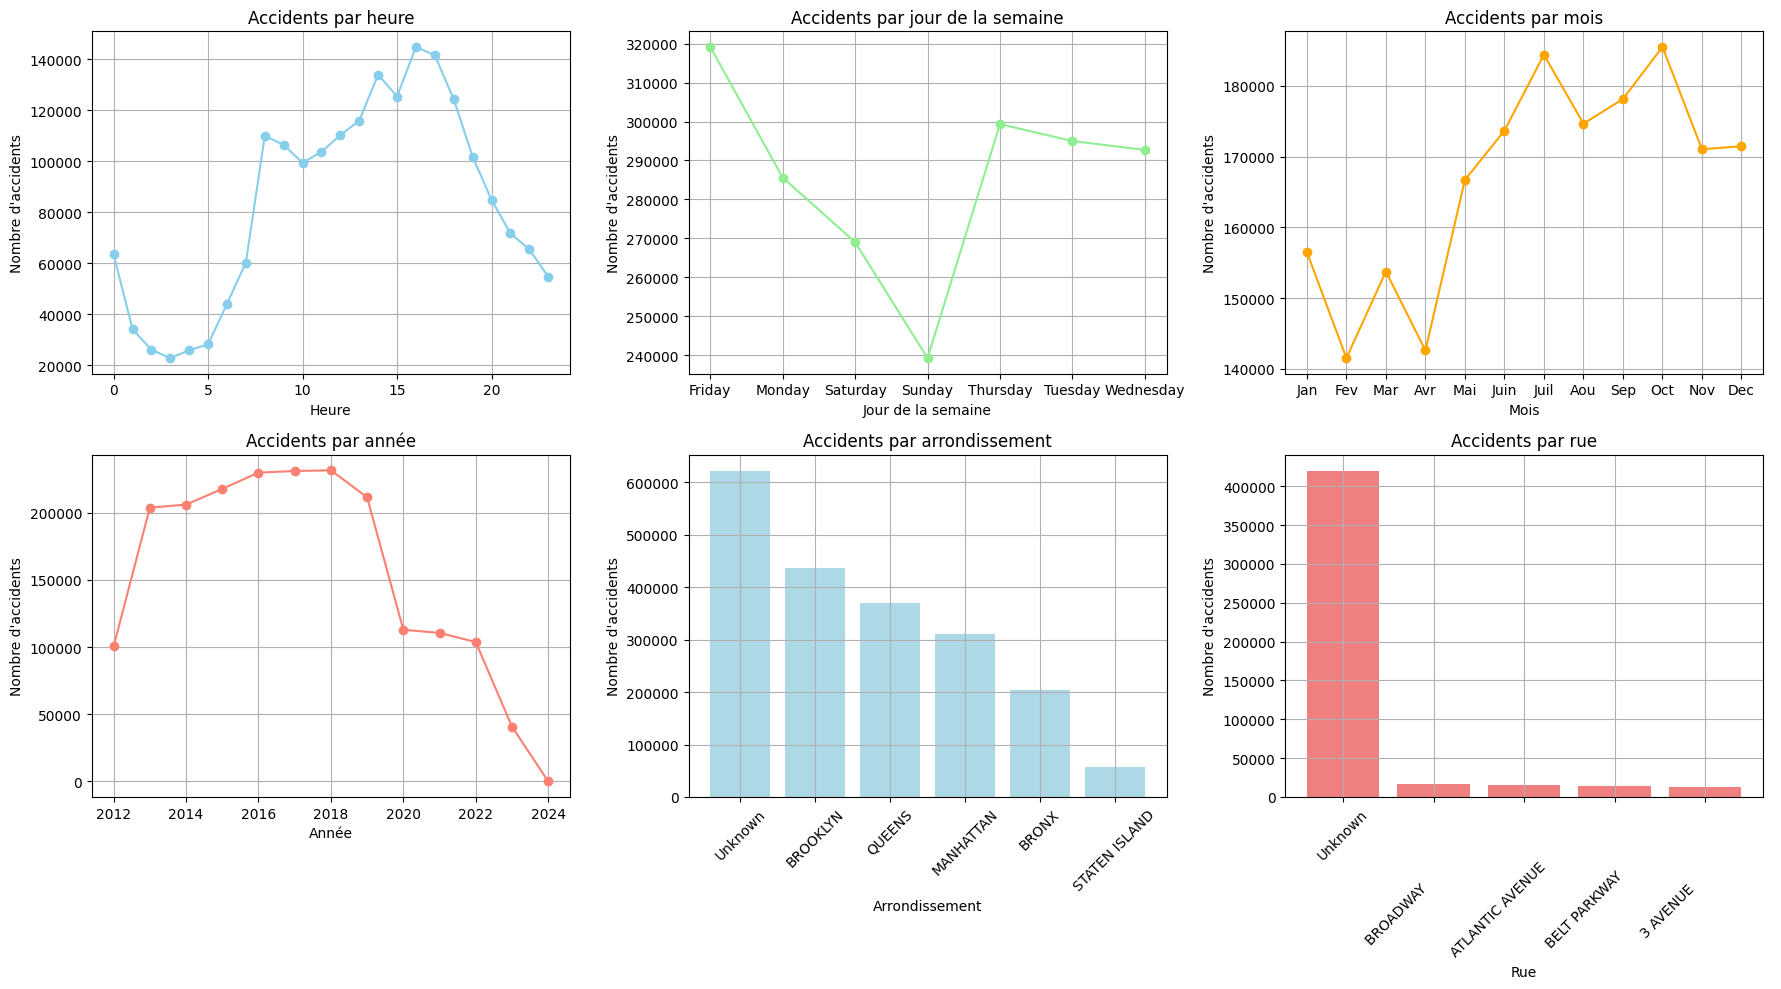

In [208]:
import calendar

# Liste des noms abr√©g√©s des mois
abrege_mois = ['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec']

# Cr√©ation de la grille de sous-graphiques
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Variable 'hour'
accidents_par_hour = accident_data['hour'].value_counts().sort_index()
axs[0, 0].plot(accidents_par_hour.index, accidents_par_hour.values, marker='o', color='skyblue')
axs[0, 0].set_title('Accidents par heure')
axs[0, 0].set_xlabel('Heure')
axs[0, 0].set_ylabel("Nombre d'accidents")
axs[0, 0].grid(True)

# Variable 'day_of_week'
accidents_par_day = accident_data['day_of_week'].value_counts().sort_index()
axs[0, 1].plot(accidents_par_day.index, accidents_par_day.values, marker='o', color='lightgreen')
axs[0, 1].set_title('Accidents par jour de la semaine')
axs[0, 1].set_xlabel('Jour de la semaine')
axs[0, 1].set_ylabel("Nombre d'accidents")
axs[0, 1].grid(True)

# Variable 'month'
accidents_par_month = accident_data['month'].value_counts().sort_index()
axs[0, 2].plot(abrege_mois, accidents_par_month.values, marker='o', color='orange')
axs[0, 2].set_title('Accidents par mois')
axs[0, 2].set_xlabel('Mois')
axs[0, 2].set_ylabel("Nombre d'accidents")
axs[0, 2].grid(True)

# Variable 'year'
accidents_par_year = accident_data['year'].value_counts().sort_index()
axs[1, 0].plot(accidents_par_year.index, accidents_par_year.values, marker='o', color='salmon')
axs[1, 0].set_title('Accidents par ann√©e')
axs[1, 0].set_xlabel('Ann√©e')
axs[1, 0].set_ylabel("Nombre d'accidents")
axs[1, 0].grid(True)

# Variable 'borough'
accidents_par_borough = accident_data['borough'].value_counts()
axs[1, 1].bar(accidents_par_borough.index, accidents_par_borough.values, color='lightblue')
axs[1, 1].set_title('Accidents par arrondissement')
axs[1, 1].set_xlabel('Arrondissement')
axs[1, 1].set_ylabel("Nombre d'accidents")
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

# Variable 'on_street_name'
accidents_par_street = accident_data['on_street_name'].value_counts().head(5)  # Prend les 5 premi√®res rues
axs[1, 2].bar(accidents_par_street.index, accidents_par_street.values, color='lightcoral')
axs[1, 2].set_title('Accidents par rue')
axs[1, 2].set_xlabel('Rue')
axs[1, 2].set_ylabel("Nombre d'accidents")
axs[1, 2].tick_params(axis='x', rotation=45)
axs[1, 2].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

# **Graphique pour l'analyse Bivari√©e**

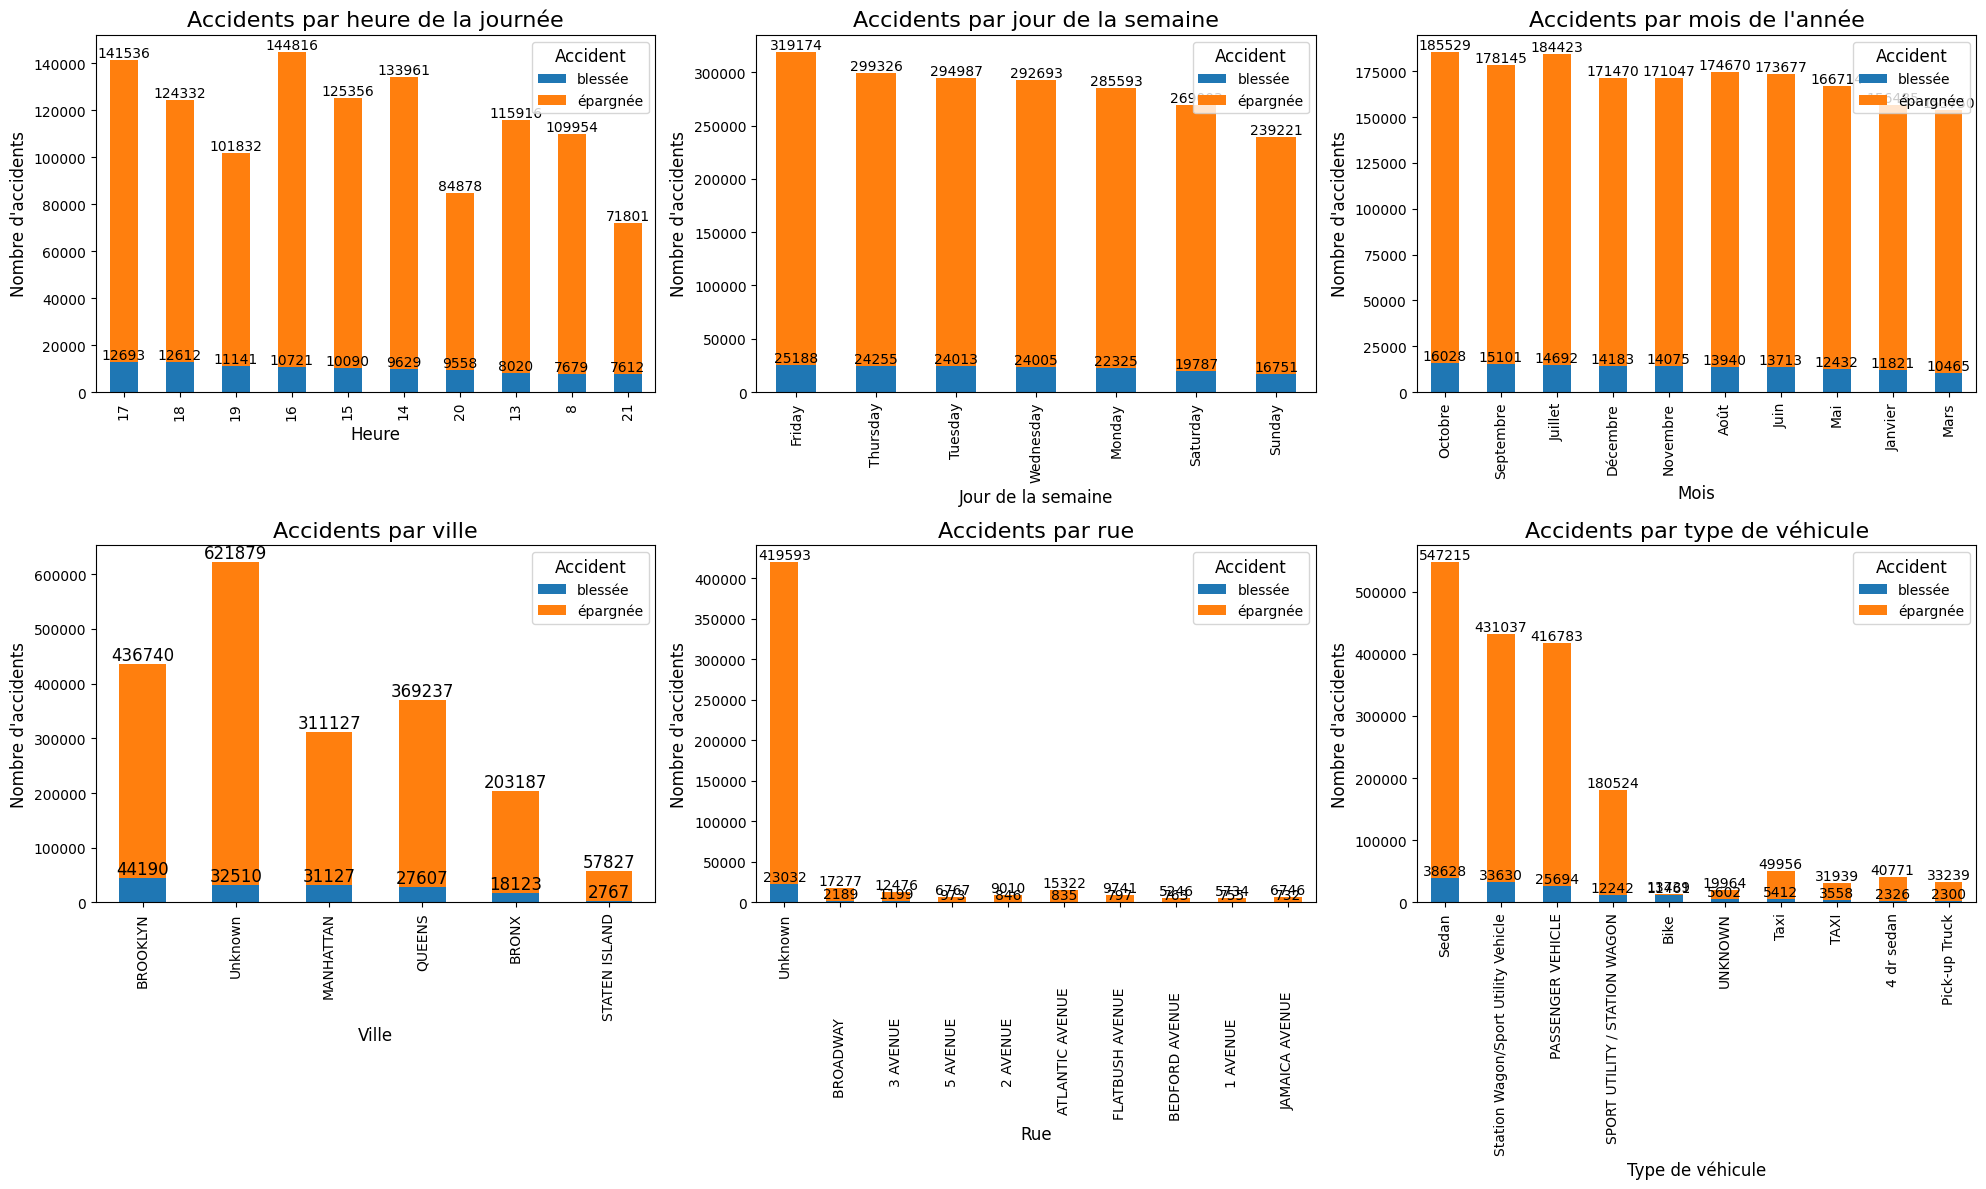

In [209]:
# Cr√©er une figure et des sous-graphiques
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Analyse bivari√©e entre "Accident" et l'heure
accident_by_hour = accident_data.groupby(['hour', 'Accident']).size().unstack().nlargest(10, 'bless√©e')
accident_by_hour.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Accidents par heure de la journ√©e', fontsize=16)
axes[0, 0].set_xlabel('Heure', fontsize=12)
axes[0, 0].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[0, 0].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivari√©e entre "Accident" et le jour de la semaine
accident_by_day = accident_data.groupby(['day_of_week', 'Accident']).size().unstack().nlargest(10, 'bless√©e')
accident_by_day.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Accidents par jour de la semaine', fontsize=16)
axes[0, 1].set_xlabel('Jour de la semaine', fontsize=12)
axes[0, 1].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[0, 1].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivari√©e entre "Accident" et le mois de l'ann√©e
month_names = ['Janvier', 'F√©vrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Ao√ªt', 'Septembre', 'Octobre', 'Novembre', 'D√©cembre']
accident_by_month = accident_data.groupby(['month', 'Accident']).size().unstack().nlargest(10, 'bless√©e')
accident_by_month.index = [month_names[i - 1] for i in accident_by_month.index]  # Convertir les indices des mois en noms de mois
accident_by_month.plot(kind='bar', stacked=True, ax=axes[0, 2])
axes[0, 2].set_title('Accidents par mois de l\'ann√©e', fontsize=16)
axes[0, 2].set_xlabel('Mois', fontsize=12)
axes[0, 2].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[0, 2].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[0, 2].containers:
    axes[0, 2].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivari√©e entre "Accident" et la ville
accident_by_borough = accident_data.groupby(['borough', 'Accident']).size().unstack().nlargest(10, 'bless√©e')
accident_by_borough.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Accidents par ville', fontsize=16)
axes[1, 0].set_xlabel('Ville', fontsize=12)
axes[1, 0].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[1, 0].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, label_type='edge', fontsize=12)

# Analyse bivari√©e entre "Accident" et la rue
accident_by_street = accident_data.groupby(['on_street_name', 'Accident']).size().unstack().nlargest(10, 'bless√©e')
accident_by_street.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Accidents par rue', fontsize=16)
axes[1, 1].set_xlabel('Rue', fontsize=12)
axes[1, 1].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[1, 1].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivari√©e entre "Accident" et le type de v√©hicule
accident_by_vehicle = accident_data.groupby(['vehicle_type_code1', 'Accident']).size().unstack().nlargest(10, 'bless√©e')
accident_by_vehicle.plot(kind='bar', stacked=True, ax=axes[1, 2])
axes[1, 2].set_title('Accidents par type de v√©hicule', fontsize=16)
axes[1, 2].set_xlabel('Type de v√©hicule', fontsize=12)
axes[1, 2].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[1, 2].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[1, 2].containers:
    axes[1, 2].bar_label(container, label_type='edge', fontsize=10)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

##   **IV** **<span style='color:blue;'> ANALYSE MULTIVARIEE </span>** 

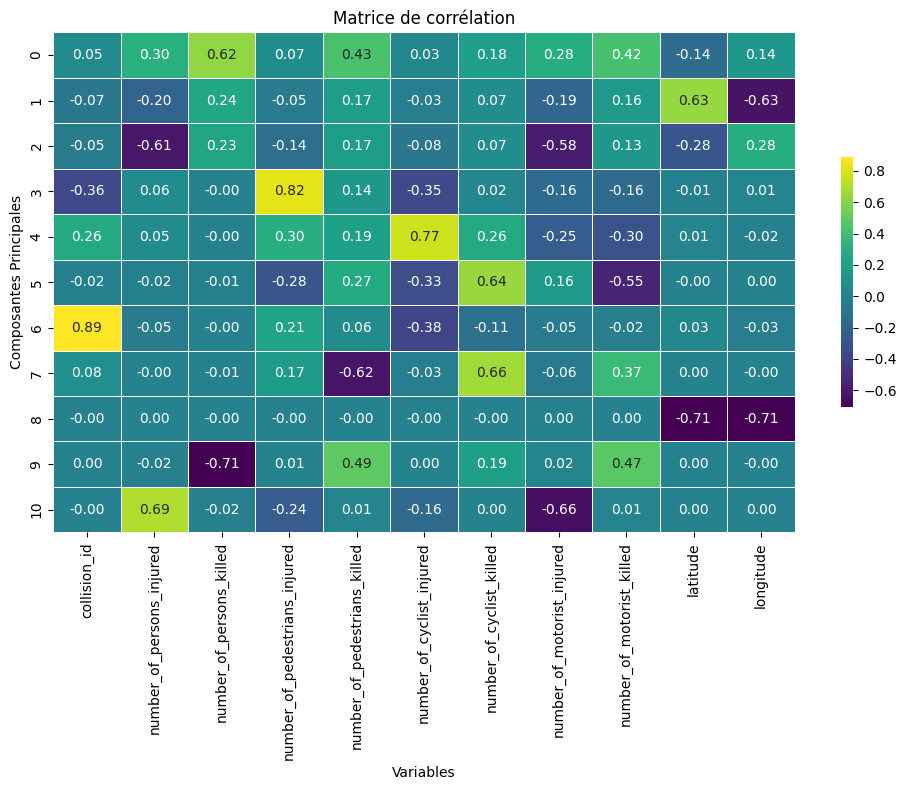

In [210]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# S√©lectionner uniquement les colonnes num√©riques dans le DataFrame
numeric_columns = accident_data.select_dtypes(include=['float64', 'int64'])

# Standardisation des donn√©es
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Effectuer l'Analyse en Composantes Principales (ACP)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Visualiser la corr√©lation entre les variables s√©lectionn√©es
correlation_matrix = pd.DataFrame(pca.components_, columns=numeric_columns.columns)

# D√©finir une taille de figure 
plt.figure(figsize=(10, 8))

# Cr√©er la carte de chaleur avec des annotations, une palette de couleurs et un formatage appropri√©s
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Ajouter un titre √† la carte de chaleur
plt.title('Matrice de corr√©lation')

# Ajouter des labels aux axes x et y
plt.xlabel('Variables')
plt.ylabel('Composantes Principales')

# Afficher la barre de couleur pour indiquer les valeurs de corr√©lation
colorbar = heatmap.collections[0].colorbar

# Ajuster la disposition pour √©viter que les annotations ne soient tronqu√©es
plt.tight_layout()

# Afficher la carte de chaleur
plt.show()


**Composante Principale 1** :
Cette composante principale est fortement associ√©e aux caract√©ristiques li√©es au nombre de victimes mortelles dans les accidents de la circulation. Les variables les plus significatives sont le nombre de personnes tu√©es, le nombre de pi√©tons tu√©s et le nombre de conducteurs tu√©s. Cela sugg√®re que cette composante capture la gravit√© des accidents entra√Ænant des pertes de vies humaines.

**Composante Principale 2** :
Cette composante principale est principalement d√©finie par les coordonn√©es g√©ographiques, la latitude et la longitude. Les poids √©lev√©s de ces deux variables indiquent que cette composante repr√©sente la localisation spatiale des accidents. Une valeur positive de latitude et une valeur n√©gative de longitude peuvent correspondre √† une localisation sp√©cifique, et vice versa.

**Composante Principale 3** :
Cette composante principale est li√©e aux caract√©ristiques des accidents entra√Ænant des blessures, en particulier le nombre de personnes bless√©es et le nombre de conducteurs bless√©s. Les poids √©lev√©s de ces deux variables sugg√®rent que cette composante capture des informations sur les accidents moins graves impliquant des blessures.

**Composante Principale 4** :
Cette composante principale est fortement associ√©e au nombre de pi√©tons bless√©s dans les accidents. Le poids √©lev√© de la variable "number_of_pedestrians_injured" indique que cette composante capture des informations sp√©cifiques sur les accidents impliquant des pi√©tons bless√©s.

**Composante Principale 5** :
Cette composante principale est principalement d√©finie par le nombre de cyclistes bless√©s dans les accidents. Cela sugg√®re que cette composante capture des informations sur les accidents impliquant des cyclistes bless√©s, ce qui pourrait √™tre utile pour les analyses de s√©curit√© routi√®re concernant les cyclistes.

**Composante Principale 6** :
Cette composante principale est associ√©e au nombre de victimes cyclistes tu√©es et bless√©es, ainsi qu'au nombre de conducteurs tu√©s. Les poids √©lev√©s de ces variables sugg√®rent que cette composante repr√©sente des informations sur les accidents impliquant des cyclistes, √† la fois mortels et non mortels.

##   **V** **<span style='color:blue;'> LA MODELISATION </span>** 

## Distribution de la variable accident

C:\Users\pc\AppData\Local\Temp\ipykernel_3132\1273661475.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  barplot.text(i, accident_counts[i] + 10000, f'{value:.2%}', ha='center')


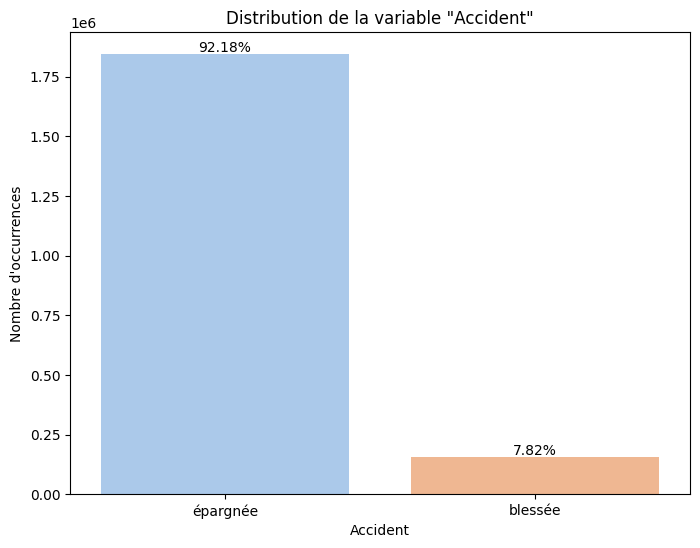

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter les occurrences de chaque classe dans la variable 'Accident'
accident_counts = accident_data['Accident'].value_counts()

# Calculer les proportions de chaque classe
total_samples = len(accident_data)
proportions = accident_counts / total_samples

# Tracer un graphique √† barres pour visualiser la distribution avec les proportions
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=['√©pargn√©e', 'bless√©e'], y=accident_counts.values, palette="pastel", hue=['√©pargn√©e', 'bless√©e'], dodge=False)

# Annoter chaque barre avec sa proportion
for i, value in enumerate(proportions):
    barplot.text(i, accident_counts[i] + 10000, f'{value:.2%}', ha='center')

plt.title('Distribution de la variable "Accident"')
plt.xlabel('Accident')
plt.ylabel('Nombre d\'occurrences')
plt.show()

### Dans notre jeu de donn√©es, nous observons que 92,18 % des accidents n'ont pas entra√Æn√© de blessure, tandis que 7,82 % ont conduit √† des blessures. Ces observations nous incitent √† √©laborer un mod√®le pour pr√©dire si une victime sera bless√©e ou √©pargn√©e lors d'un accident

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

accident_data_copy = accident_data.copy()
# Binariser la colonne 'Accident' en utilisant des valeurs 0 ou 1
accident_data_copy['Accident'] = (accident_data_copy['Accident'] == 'bless√©e').astype(int)

# Supposons que categorical_columns est une liste de noms de colonnes cat√©gorielles que vous avez d√©j√† d√©finie

# Calculer la fr√©quence des cat√©gories dans chaque colonne cat√©gorielle
for column in categorical_columns:
    frequency_mapping = accident_data_copy[column].value_counts(normalize=True).to_dict()
    accident_data_copy[column] = accident_data_copy[column].map(frequency_mapping)

# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X = accident_data_copy.drop('Accident', axis=1)
y = accident_data_copy['Accident']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les valeurs de y en 0 et 1
y_train_binary = y_train
y_test_binary = y_test
y_train_binary = (y_train_binary == 'bless√©e').astype(int)
y_test_binary = (y_test_binary == 'bless√©e').astype(int)

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Cr√©er une copie de accident_data pour conserver l'original intact
accident_data_copy = accident_data.copy()

# Supprimer les colonnes non pertinentes
accident_data_copy.drop(['crash_date', 'collision_id', 'crash_time', 'on_street_name', 'location','location',"L'heure de l'accident",'hour_range'], axis=1, inplace=True)

In [214]:
# R√©cup√©rer les noms des colonnes avec des types de donn√©es cat√©goriels
categorical_columns = accident_data_copy.select_dtypes(include=['object']).columns.tolist()

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Binariser la colonne 'Accident' en utilisant des valeurs 0 ou 1
accident_data_copy['Accident'] = (accident_data_copy['Accident'] == 'bless√©e').astype(int)


# Calculer la fr√©quence des cat√©gories dans chaque colonne cat√©gorielle
for column in categorical_columns:
    frequency_mapping = accident_data_copy[column].value_counts(normalize=True).to_dict()
    accident_data_copy[column] = accident_data_copy[column].map(frequency_mapping)

# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X = accident_data_copy.drop('Accident', axis=1)
y = accident_data_copy['Accident']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les valeurs de y en 0 et 1
y_train_binary = y_train
y_test_binary = y_test
y_train_binary = (y_train_binary == 'bless√©e').astype(int)
y_test_binary = (y_test_binary == 'bless√©e').astype(int)

# Initialiser et entra√Æner le mod√®le XGBoost
model = XGBClassifier()
model.fit(X_train, y_train_binary)

# Faire des pr√©dictions
y_pred = model.predict(X_test)

# √âvaluer la performance du mod√®le
accuracy = accuracy_score(y_test_binary, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Notre modele semble etre parafit mais on a un risque de surapprentissage de l'echantillon train, nous allons verifier ceci dans les lignes qui vont suivre

In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Diviser les donn√©es en ensembles d'entra√Ænement, de validation et de test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42) # 60% train, 20% validation, 20% test

# Convertir les valeurs de y en 0 et 1
y_train_binary = (y_train == 'bless√©e').astype(int)
y_val_binary = (y_val == 'bless√©e').astype(int)
y_test_binary = (y_test == 'bless√©e').astype(int)

# Initialiser et entra√Æner le mod√®le XGBoost
model = XGBClassifier()
model.fit(X_train, y_train_binary)

# √âvaluer la performance du mod√®le sur l'ensemble de validation
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val_binary, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# la performance sur l'ensemble de validation est satisfaisante, et √©valuation sur l'ensemble de test
if val_accuracy > 0.8:  
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test_binary, y_test_pred)
    print("Test Accuracy:", test_accuracy)
else:
    print("Model performance on validation set not satisfactory. Try adjusting hyperparameters.")

# Convertir les valeurs de y_train_val en 0 et 1 pour la validation crois√©e
y_train_val_binary = (y_train_val == 'bless√©e').astype(int)

# Utiliser la validation crois√©e pour √©valuer la performance du mod√®le
cv_scores = cross_val_score(model, X_train_val, y_train_val_binary, cv=5)  # Utilisation de la validation crois√©e √† 5 plis
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Validation Accuracy: 1.0
Test Accuracy: 1.0
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


Les performances du mod√®le sont exceptionnelles, avec une pr√©cision parfaite de 100% √† la fois sur l'ensemble de validation et l'ensemble de test, ce qui d√©note une excellente capacit√© √† g√©n√©raliser sur de nouvelles donn√©es.

Nos r√©sultats de validation crois√©e montrent une pr√©cision maximale sur chaque partition des donn√©es, indiquant une robustesse et une fiabilit√© du mod√®le sur des ensembles de donn√©es vari√©s.

Les scores de pr√©cision coh√©rents √† travers toutes les m√©triques √©valu√©es t√©moignent de la qualit√© de l'apprentissage du mod√®le et de son aptitude √† capturer les relations complexes pr√©sentes dans les donn√©es.

Ces r√©sultats confirment la capacit√© du mod√®le √† apprendre de mani√®re exhaustive les caract√©ristiques des donn√©es d'entra√Ænement, et √† les g√©n√©raliser avec une pr√©cision remarquable sur de nouvelles instances.

Il semble que nos donnees ont trop appris sur la base d'entrainement et n'arrive pas a faire une bonne prediction sur la base test

# **Recherche des hyperparametres**

In [217]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les valeurs de y en 0 et 1
y_train_binary = (y_train == 'bless√©e').astype(int)

# D√©finir la grille des hyperparam√®tres √† rechercher
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Initialiser le mod√®le XGBoost
model = XGBClassifier()

# Initialiser la recherche en grille
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Ex√©cuter la recherche en grille sur les donn√©es d'entra√Ænement
grid_search.fit(X_train, y_train_binary)

# Obtenir les meilleurs hyperparam√®tres
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Utiliser le mod√®le avec les meilleurs hyperparam√®tres
best_model = grid_search.best_estimator_

# Faire des pr√©dictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Convertir les valeurs de y_test en 0 et 1
y_test_binary = (y_test == 'bless√©e').astype(int)

# √âvaluer la performance du mod√®le
accuracy = accuracy_score(y_test_binary, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 1.0


**Il semble que notre mod√®le soit trop complexe, ayant appris excessivement sur l'ensemble d'entra√Ænement, ce qui entrave sa capacit√© √† pr√©dire efficacement sur l'ensemble de test. Pour r√©soudre ce probl√®me, nous devons simplifier le mod√®le et introduire de nouvelles caract√©ristiques**

****

#   **VI**            **<span style='color:blue;'> CONCLUSION </span>**     

<div style="border: 10px solid green;padding:12px;font-size: 18px;">Apr√®s une analyse approfondie des donn√©es sur les accidents de la route, on peut deduire que les comportements n√©gligents des conducteurs, tels que l'inattention/distraction, le non-respect des priorit√©s et le suivi trop serr√©, sont des facteurs pr√©dominants dans les accidents. Par exemple, l'inattention au volant peut inclure l'utilisation du t√©l√©phone portable pendant la conduite, comme observ√© dans de nombreux cas d'accidents caus√©s par des conducteurs distraits.
Tendances temporelles et spatiales :
Certains jours de la semaine et heures de la journ√©e pr√©sentent des taux d'accidents plus √©lev√©s. Par exemple, les donn√©es r√©v√®lent une augmentation significative des accidents les vendredis apr√®s-midi, ce qui pourrait √™tre li√© √† une combinaison de fatigue accrue, de circulation intense et de comportements imprudents avant le week-end.
Impact des interventions bas√©es sur les donn√©es : En analysant les donn√©es, il est observ√© qu'entre 7 heures et 9 heures du matin, ainsi qu'entre 16 heures et 18 heures les vendredis, les usagers de la route traversant les rues de Brooklyn ou de Queens pr√©sentent un risque significativement accru d'accident ou de collision avec des conducteurs inattentifs ou distraits et ceci surtout en √©t√©.</div>

 ***

<span style="font-size: 250px;">üôè</span> <span style="font-size: 250px;">üôè</span><span style="font-size: 250px;">üôè</span> <span style="font-size: 250px;">üôè</span>
